In [693]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [694]:
mac = 0.1091667 #ft, mean aerodynamic chord
S = 0.0604 # ft^2,planform area of both wings
weight = 1.702143653 #lbf, weight of both wings

In [695]:
plt.style.use('seaborn') # pretty matplotlib plots
#plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.linestyle'] ='-'

In [696]:
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)


### reading in data

Uncertainty of normal forces : 20lb *0.05 = 1 -> round all normal forces to the unit digit

Uncertainty of moments: 40 in-lbf * 0.05 = 2-> round all moments to the unit digit

Uncertainty of axial forces:9 lb * 0.05 = 0.45 --> 2 decimal places

Uncertainty of angles of attack: 0.2 degrees

In [697]:
# file_name = 'designlab_#{}.csv'
# df_list = []
# for i in range(1, 5):
#     df_list.append(pd.read_csv(file_name.format(i),skiprows=3))
#     df_list[i-1] = df_list[i-1].drop(labels=0,axis=0)
#     df_list[i-1].columns = ['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]', 'AmbTemp[R]',
#        'Density[slug/ft3]', 'Viscosity[slug/ft s]', 'Motor Speed[RPM]', 'Angle of Attack[deg]',
#        'Corrected q', 'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
#        'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]']
    
# for m in range(len(df_list)):
#     df_list[m] = df_list[m].astype(float)
#     #df_list[m] = df_list[m].round(decimals=3)
#     df_list[m]['Normal Force[Lbf]'] = df_list[m]['Normal Force[Lbf]'].round(decimals=0)
#     df_list[m]['Pitching Mom[in-Lbf]'] = df_list[m]['Pitching Mom[in-Lbf]'].round(decimals=0)
#     df_list[m]['Axial Force[Lbf]'] = df_list[m]['Axial Force[Lbf]'].round(decimals=2)
#     df_list[m]['Angle of Attack[deg]'] = df_list[m]['Angle of Attack[deg]'].round(decimals = 1)
#     df_list[m]['Angle of Attack[rad]'] = np.radians(df_list[m]['Angle of Attack[deg]'])
    

In [698]:
# file_name = 'designlab_yaw#{}.csv'
# df_list_yaw = []
# for i in range(1, 3):
#     df_list_yaw.append(pd.read_csv(file_name.format(i),skiprows=3))
#     df_list_yaw[i-1] = df_list_yaw[i-1].drop(labels=0,axis=0)
#     df_list_yaw[i-1].columns = ['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]', 'AmbTemp[R]',
#        'Density[slug/ft3]', 'Viscosity[slug/ft s]', 'Motor Speed[RPM]', 'Angle of Attack[deg]',
#        'Corrected q', 'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
#        'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]']
#     #df_list_yaw[i-1] = df_list_yaw[i-1].round(decimals=3)

# for m in range(len(df_list_yaw)):
#     df_list_yaw[m] = df_list_yaw[m].astype(float)
#     df_list_yaw[m]['Normal Force[Lbf]'] = df_list[m]['Normal Force[Lbf]'].round(decimals=0)
#     df_list_yaw[m]['Pitching Mom[in-Lbf]'] = df_list[m]['Pitching Mom[in-Lbf]'].round(decimals=0)
#     df_list_yaw[m]['Axial Force[Lbf]'] = df_list[m]['Axial Force[Lbf]'].round(decimals=2)
#     df_list_yaw[m]['Angle of Attack[deg]'] = df_list[m]['Angle of Attack[deg]'].round(decimals = 1)
#     df_list_yaw[m]['Angle of Attack[rad]'] = np.radians(df_list[m]['Angle of Attack[deg]'])
#     #df_list_yaw[m]['Angle of Attack[rad]'] = df_list[m]['Angle of Attack[rad]'].round(decimals=1)

In [699]:
# file_name = 'upsidedown_#{}.csv'
# df_upsideDown = []
# for i in range(1, 3):
#     df_upsideDown.append(pd.read_csv(file_name.format(i),skiprows=3))
#     df_upsideDown[i-1] = df_upsideDown[i-1].drop(labels=0,axis=0)
#     df_upsideDown[i-1].columns = ['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]', 'AmbTemp[R]',
#        'Density[slug/ft3]', 'Viscosity[slug/ft s]', 'Motor Speed[RPM]', 'Angle of Attack[deg]',
#        'Corrected q', 'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
#        'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]']
#     #df_upsideDown[i-1] = df_upsideDown[i-1].round(decimals=3)
    
# for m in range(len(df_list_yaw)):
#     df_upsideDown[m] = df_upsideDown[m].astype(float)
#     df_upsideDown[m]['Normal Force[Lbf]'] = df_list[m]['Normal Force[Lbf]'].round(decimals=0)
#     df_upsideDown[m]['Pitching Mom[in-Lbf]'] = df_list[m]['Pitching Mom[in-Lbf]'].round(decimals=0)
#     df_upsideDown[m]['Axial Force[Lbf]'] = df_list[m]['Axial Force[Lbf]'].round(decimals=2)
#     df_upsideDown[m]['Angle of Attack[deg]'] = df_list[m]['Angle of Attack[deg]'].round(decimals = 1)
#     df_upsideDown[m]['Angle of Attack[rad]'] = np.radians(df_list[m]['Angle of Attack[deg]'])
#     #df_upsideDown[m]['Angle of Attack[rad]'] = df_list[m]['Angle of Attack[rad]'].round(decimals=1)

# Question3.

### this section below processes data for the first three trials where velocity changes from 40ft/s to 120ft/s as AOA ranges from -5 deg to +19 deg

$\mathrm{L}=\mathrm{N} \cos ({\alpha})-\mathrm{A} \sin ({\alpha})$



$\mathrm{D}=\mathrm{N} \sin ({\alpha})+\mathrm{A} \cos ({\alpha})$





In [700]:
# #this is the offset in normal and axial force caused by the raw weight of the wings
# lift_list0 = []
# drag_list0 = []

# N0 = df_list[0]['Normal Force[Lbf]'].astype(float)
# A0 = df_list[0]['Axial Force[Lbf]'].astype(float)
# M0 = df_list[0]['Pitching Mom[in-Lbf]'].astype(float)*0.0833333
# alpha = df_list[0]['Angle of Attack[rad]'].astype(float)
# lift_list0.append(N0*np.cos(alpha)-A0*np.sin(alpha))
# drag_list0.append(N0*np.sin(alpha)+A0*np.cos(alpha))



# #CL_0 = np.array(lift_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)
# #CD_0 = np.array(drag_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)

# df_list[0] = df_list[0].round(decimals=3)
# df_list[0]

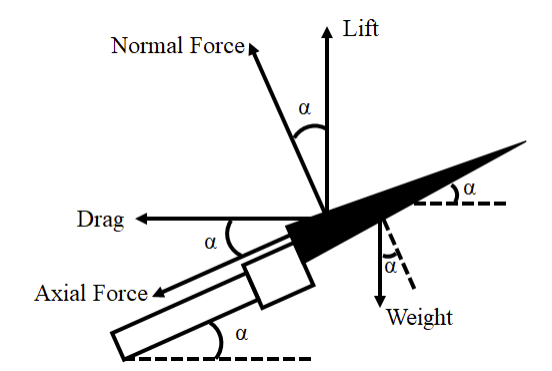|

In [701]:
df_list[0].columns

Index(['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]',
       'AmbTemp[R]', 'Density[slug/ft3]', 'Viscosity[slug/ft s]',
       'Motor Speed[RPM]', 'Angle of Attack[deg]', 'Corrected q',
       'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]', 'Angle of Attack[rad]'],
      dtype='object')

In [702]:
# N1 = (df_list[1]['Normal Force[Lbf]']-N0).astype(float)
# A1 = (df_list[1]['Axial Force[Lbf]']-A0).astype(float)
# alpha = df_list[1]['Angle of Attack[rad]'].astype(float)
# lift1 = N1*np.cos(alpha)-A1*np.sin(alpha)
# drag1 = N1*np.sin(alpha)+A1*np.cos(alpha)
    
# #q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

# CL_1 = lift1/(df_list[1]['Corrected q']*144*S)
# CD_1 = drag1/(df_list[1]['Corrected q']*144*S)
    
# df_list[1]['Lift[Lbf]']=lift1
# df_list[1]['Drag[Lbf]']=drag1
# df_list[1]['Lift Coef'] = CL_1
# df_list[1]['Drag Coef'] = CD_1

# df_list[1]['Pitching Mom[in-Lbf]'] = df_list[1]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
# df_list[1]['Moment Coef'] =  df_list[1]['Pitching Mom[in-Lbf]'] /(df_list[1]['Corrected q']*144*S*mac)                     

# df_list[1]


In [703]:
# N2 = (df_list[2]['Normal Force[Lbf]']-N0).astype(float)
# A2 = (df_list[2]['Axial Force[Lbf]']-A0).astype(float)
# alpha = df_list[2]['Angle of Attack[rad]'].astype(float)
# lift2 = N2*np.cos(alpha)-A2*np.sin(alpha)
# drag2 = N2*np.sin(alpha)+A2*np.cos(alpha)
    
# #q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

# CL_2 = lift2/(df_list[2]['Corrected q']*144*S)
# CD_2 = drag2/(df_list[2]['Corrected q']*144*S)
    
# df_list[2]['Lift[Lbf]']=lift2
# df_list[2]['Drag[Lbf]']=drag2
# df_list[2]['Lift Coef'] = CL_2
# df_list[2]['Drag Coef'] = CD_2

# df_list[2]['Pitching Mom[in-Lbf]'] = df_list[2]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
# df_list[2]['Moment Coef'] =  df_list[2]['Pitching Mom[in-Lbf]'] /(df_list[2]['Corrected q']*144*S*mac)                     

# df_list[2]

In [704]:
# N3 = (df_list[3]['Normal Force[Lbf]']-N0).astype(float)
# A3 = (df_list[3]['Axial Force[Lbf]']-A0).astype(float)
# alpha = df_list[3]['Angle of Attack[rad]'].astype(float)
# lift3 = N3*np.cos(alpha)-A3*np.sin(alpha)
# drag3 = N3*np.sin(alpha)+A3*np.cos(alpha)
    
# #q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

# CL_3 = lift3/(df_list[3]['Corrected q']*144*S)
# CD_3 = drag3/(df_list[3]['Corrected q']*144*S)
    
# df_list[3]['Lift[Lbf]']=lift3
# df_list[3]['Drag[Lbf]']=drag3
# df_list[3]['Lift Coef'] = CL_3
# df_list[3]['Drag Coef'] = CD_3

# df_list[3]['Pitching Mom[in-Lbf]'] = df_list[3]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
# df_list[3]['Moment Coef'] =  df_list[3]['Pitching Mom[in-Lbf]'] /(df_list[3]['Corrected q']*144*S*mac)                     

# df_list[3]

In [705]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[1],label='Velocity=40ft/s');
# sns.lineplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[1],label='Velocity=40ft/s');

# sns.scatterplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);
# sns.lineplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);

# sns.scatterplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
# sns.lineplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
# plt.legend(fontsize=8)
# #plt.yticks(np.arange(-4,4,step=0.3));
# plt.xticks(np.arange(-5,21,step=2));
# plt.yticks(np.arange(-0.5,2.7,step=0.3));
# plt.ylabel('Lift Coefficient',fontsize=10);
# plt.xlabel('Angle of Attack [deg]',fontsize=10);
# plt.title('$C_L$ vs $alpha$',fontsize=10)
# plt.savefig('lift_plot1.png',dpi=200);

In [706]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[1],label='Velocity=40ft/s');
# sns.lineplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[1],label='Velocity=40ft/s');

# sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);
# sns.lineplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);

# sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
# sns.lineplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
# plt.legend(fontsize=8)
# #plt.yticks(np.arange(-4,4,step=0.3));
# plt.xticks(np.arange(-5,21,step=2));
# plt.yticks(np.arange(-0.5,2.7,step=0.3));
# plt.ylabel('Drag Coefficient',fontsize=10);
# plt.xlabel('Angle of Attack [deg]',fontsize=10);
# plt.title('$C_D$ vs $alpha$',fontsize=10);
# plt.savefig('drag_plot1.png',dpi=200);

In [707]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[1],label='Velocity=40ft/s');
# sns.lineplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[1],label='Velocity=40ft/s');

# sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);
# sns.lineplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);

# sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
# sns.lineplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
# plt.legend(fontsize=8)
# #plt.yticks(np.arange(-4,4,step=0.3));
# plt.xticks(np.arange(-5,21,step=2));

# plt.ylabel('Moment Coefficient',fontsize=10);
# plt.xlabel('Angle of Attack [deg]',fontsize=10);
# plt.title('$C_M$ vs $alpha$',fontsize=10);
# plt.savefig('moment_plot1.png',dpi=200);

In [708]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_list[1],label='Velocity=40ft/s',s=30);
# sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_list[1],label='Velocity=40ft/s');

# sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8,s=30);
# sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_list[2],label='Velocity=80ft/s',alpha=0.8);

# sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5,s=30);
# sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_list[3],label='Velocity=120ft/s',alpha=0.5);
# plt.legend(fontsize=8)
# plt.yticks(np.arange(-0.5,3.1,step=0.3));
# plt.xticks(np.arange(0,2.25,step=0.25));
# plt.ylabel('Lift Coefficient',fontsize=9);
# plt.xlabel('Drag Coefficient',fontsize=9);
# plt.title('$C_L$ vs $C_D$',fontsize=10);
# plt.savefig('CL_vs_CD.png',dpi=200);

### this section below processes data for the test trials when the prototype is rotated 90 degrees

In [709]:

# lift_list0 = []
# drag_list0 = []

# N0 = df_list_yaw[0]['Normal Force[Lbf]'].astype(float)
# A0 = df_list_yaw[0]['Axial Force[Lbf]'].astype(float)
# M0 = df_list_yaw[0]['Pitching Mom[in-Lbf]'].astype(float)*0.0833333
# alpha = df_list_yaw[0]['Angle of Attack[rad]'].astype(float)
# lift_list0.append(N0*np.cos(alpha)-A0*np.sin(alpha))
# drag_list0.append(N0*np.sin(alpha)+A0*np.cos(alpha))



# #CL_0 = np.array(lift_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)
# #CD_0 = np.array(drag_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)

# df_list_yaw[0] = df_list[0].round(decimals=3)
# df_list_yaw[0]

In [710]:
# N1 = (df_list_yaw[1]['Normal Force[Lbf]']-N0).astype(float)
# A1 = (df_list_yaw[1]['Axial Force[Lbf]']-A0).astype(float)
# alpha = df_list_yaw[1]['Angle of Attack[rad]'].astype(float)
# lift1 = N3*np.cos(alpha)-A3*np.sin(alpha)
# drag1 = N3*np.sin(alpha)+A3*np.cos(alpha)
    
# #q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

# CL_1 = lift1/(df_list_yaw[1]['Corrected q']*144*S)
# CD_1 = drag1/(df_list_yaw[1]['Corrected q']*144*S)
    
# df_list_yaw[1]['Lift[Lbf]']=lift1
# df_list_yaw[1]['Drag[Lbf]']=drag1
# df_list_yaw[1]['Lift Coef'] = CL_1
# df_list_yaw[1]['Drag Coef'] = CD_1

# df_list_yaw[1]['Pitching Mom[in-Lbf]'] = df_list_yaw[1]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
# df_list_yaw[1]['Moment Coef'] =  df_list_yaw[1]['Pitching Mom[in-Lbf]'] /(df_list_yaw[1]['Corrected q']*144*S*mac)                     

# df_list_yaw[1]

In [711]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_list_yaw[1],label='Velocity=50ft/s,roll angle=90 deg');
# sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_list_yaw[1],label='Velocity=50ft/s,roll angle=90 deg');

# plt.legend(fontsize=8)
# plt.yticks(np.arange(-2,8,step=0.5));
# #plt.xticks(np.arange(-2,8,step=0.5));
# plt.ylabel('Lift Coefficient in yaw',fontsize=9);
# plt.xlabel('Drag Coefficient in yaw',fontsize=9);
# plt.title('$C_L$ vs $C_D$',fontsize=10);
# plt.savefig('CL_vs_CD_yaw.png',dpi=200);

In [712]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');
# sns.lineplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');
# plt.legend(fontsize=8)
# plt.ylim(-0.7,0.4)
# #plt.xticks(np.arange(-10,12,step=2));

# plt.ylabel('Moment Coefficient in yaw',fontsize=10);
# plt.xlabel('Angle of Attack [deg] in yaw',fontsize=10);
# plt.title('$C_M$ vs $alpha$',fontsize=10);
# plt.savefig('moment_yaw.png',dpi=200);

In [713]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');
# sns.lineplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');

# plt.legend(fontsize=8)
# plt.yticks(np.arange(0.6,2.6,step=0.2));
# plt.xticks(np.arange(-10,12,step=2));
# #plt.yticks(np.arange(-0.5,2.7,step=0.3));
# plt.ylabel('Drag Coefficient in yaw',fontsize=10);
# plt.xlabel('Angle of Attack [deg] in yaw',fontsize=10);
# plt.title('$C_D$ vs $alpha$',fontsize=10);
# plt.savefig('drag_plot_yaw.png',dpi=200);

In [714]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');
# sns.lineplot(x='Angle of Attack[deg]',y='Lift Coef',data=df_list_yaw[1],label='Velocity=40ft/s,roll angle=90 deg');
# plt.legend(fontsize=8)
# plt.yticks(np.arange(-2,9,step=0.5));
# #plt.xticks(np.arange(-5,21,step=2));
# #plt.yticks(np.arange(-0.5,2.7,step=0.3));
# plt.ylabel('Lift Coefficient in yaw',fontsize=10);
# plt.xlabel('Angle of Attack [deg] in yaw',fontsize=10);
# plt.title('$C_L$ vs $alpha$',fontsize=10)
# plt.savefig('lift_plot_yaw.png',dpi=200);

### this section below processes data for the test trials when the prototype is rotated 180 degrees (upside down)

In [715]:

# lift_list0 = []
# drag_list0 = []

# N0 = df_upsideDown[0]['Normal Force[Lbf]'].astype(float)
# A0 = df_upsideDown[0]['Axial Force[Lbf]'].astype(float)
# M0 = df_upsideDown[0]['Pitching Mom[in-Lbf]'].astype(float)*0.0833333
# alpha = df_upsideDown[0]['Angle of Attack[rad]'].astype(float)
# lift_list0.append(N0*np.cos(alpha)-A0*np.sin(alpha))
# drag_list0.append(N0*np.sin(alpha)+A0*np.cos(alpha))



# #CL_0 = np.array(lift_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)
# #CD_0 = np.array(drag_list0,dtype=float)/(0.5*0.002*(np.array(df_list[0]['Avg Velocity[ft/s]'].values,dtype=float)**2)*S)

# df_upsideDown[0] = df_upsideDown[0].round(decimals=3)
# df_upsideDown[0]

In [716]:
# N1 = (df_upsideDown[1]['Normal Force[Lbf]']-N0).astype(float)
# A1 = (df_upsideDown[1]['Axial Force[Lbf]']-A0).astype(float)
# alpha = df_upsideDown[1]['Angle of Attack[rad]'].astype(float)
# lift1 = N3*np.cos(alpha)-A3*np.sin(alpha)
# drag1 = N3*np.sin(alpha)+A3*np.cos(alpha)
    
# #q = df_list[1]['Corrected q']*144, converted from psi to lb/ft^2

# CL_1 = lift1/(df_upsideDown[1]['Corrected q']*144*S)
# CD_1 = drag1/(df_upsideDown[1]['Corrected q']*144*S)
    
# df_upsideDown[1]['Lift[Lbf]']=lift1
# df_upsideDown[1]['Drag[Lbf]']=drag1
# df_upsideDown[1]['Lift Coef'] = CL_1
# df_upsideDown[1]['Drag Coef'] = CD_1

# df_upsideDown[1]['Pitching Mom[in-Lbf]'] = df_upsideDown[1]['Pitching Mom[in-Lbf]'].astype(float)*0.083333-M0
# df_upsideDown[1]['Moment Coef'] =  df_upsideDown[1]['Pitching Mom[in-Lbf]'] /(df_upsideDown[1]['Corrected q']*144*S*mac)                     
# df_upsideDown[1]


In [717]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down',s=35);
# sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
# plt.legend(fontsize=8)
# plt.yticks(np.arange(-0.8,3.4,step=0.4));
# #plt.xticks(np.arange(-0.8,3.2,step=0.2));
# plt.ylabel('Lift Coefficient Upside-Down',fontsize=9);
# plt.xlabel('Drag Coefficient upside-Down',fontsize=9);
# plt.title('$C_L$ vs $C_D$',fontsize=10);
# plt.savefig('CL_vs_CD_upside_down.png',dpi=200);

In [718]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
# sns.lineplot(x='Angle of Attack[deg]',y='Moment Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
# plt.legend(fontsize=8)
# #plt.yticks(np.arange(-4,4,step=0.3));
# plt.xticks(np.arange(-5,21,step=2));

# plt.ylabel('Moment Coefficient Upside-Down',fontsize=10);
# plt.xlabel('Angle of Attack [deg] Upside-Down',fontsize=10);
# plt.title('$C_M$ vs $alpha$',fontsize=10);
# plt.savefig('moment_Upside-Down.png',dpi=200);

In [719]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
# sns.lineplot(x='Angle of Attack[deg]',y='Drag Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
# plt.legend(fontsize=8)
# plt.yticks(np.arange(0.2,1.8,step=0.2));
# #plt.xticks(np.arange(-5,21,step=2));
# #plt.yticks(np.arange(-0.1,2.1,step=0.3));
# plt.ylabel('Drag Coefficient Upside-Down',fontsize=10);
# plt.xlabel('Angle of Attack [deg] Upside-Down',fontsize=10);
# plt.title('$C_D$ vs $alpha$',fontsize=10);
# plt.savefig('drag_plot_Upside-Down.png',dpi=200);

In [720]:
# %matplotlib inline
# plt.figure(dpi=200);
# sns.scatterplot(x='Drag Coef',y='Lift Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
# sns.lineplot(x='Drag Coef',y='Lift Coef',data=df_upsideDown[1],label='Velocity=80ft/s, upside down');
# plt.legend(fontsize=8,loc = 'upper left')
# plt.yticks(np.arange(-0.8,3.4,step=0.4));
# #plt.xticks(np.arange(-0.8,3.0,step=0.2));
# plt.ylabel('Lift Coefficient Upside-Down',fontsize=9);
# plt.xlabel('Drag Coefficient Upside-Down',fontsize=9);
# plt.title('$C_L$ vs $C_D$',fontsize=10);
# plt.savefig('CL_vs_CD_Upside-Down.png',dpi=200);

## Question 4.Lift-to-drag ratios

In [721]:

# %matplotlib inline
# plt.figure(dpi=300);
# plt.scatter(df_upsideDown[1]['Angle of Attack[deg]'],df_upsideDown[1]['Lift Coef']/df_upsideDown[1]['Drag Coef'],label='Re = 39390,aircraft upsidedown')
# plt.plot(df_upsideDown[1]['Angle of Attack[deg]'],df_upsideDown[1]['Lift Coef']/df_upsideDown[1]['Drag Coef'],label='Re = 39390,aircraft upsidedown')

# plt.scatter(df_list_yaw[1]['Angle of Attack[deg]'],df_list_yaw[1]['Lift Coef']/df_list_yaw[1]['Drag Coef'],label='Re = 24328, aircraft roll angle = 90 deg')
# plt.plot(df_list_yaw[1]['Angle of Attack[deg]'],df_list_yaw[1]['Lift Coef']/df_list_yaw[1]['Drag Coef'],label='Re = 24328, aircraft roll angle = 90 deg')

# plt.scatter(df_list[1]['Angle of Attack[deg]'],df_list[1]['Lift Coef']/df_list[1]['Drag Coef'],label='Re = 19562, aircraft roll angle = 0 deg')
# plt.plot(df_list[1]['Angle of Attack[deg]'],df_list[1]['Lift Coef']/df_list[1]['Drag Coef'],label='Re = 19562, aircraft roll angle = 0 deg')

# plt.scatter(df_list[2]['Angle of Attack[deg]'],df_list[2]['Lift Coef']/df_list[2]['Drag Coef'],label='Re = 39194, aircraft roll angle = 0 deg')
# plt.plot(df_list[2]['Angle of Attack[deg]'],df_list[2]['Lift Coef']/df_list[2]['Drag Coef'],label='Re = 39194, aircraft roll angle = 0 deg')

# plt.scatter(df_list[3]['Angle of Attack[deg]'],df_list[3]['Lift Coef']/df_list[3]['Drag Coef'],label='Re = 58755, aircraft roll angle = 0 deg',alpha=0.7,s=30)
# plt.plot(df_list[3]['Angle of Attack[deg]'],df_list[3]['Lift Coef']/df_list[3]['Drag Coef'],label='Re = 58755, aircraft roll angle = 0 deg')
# #sns.lineplot(x='Lift Coef',y='Drag Coef',data=df_upsideDown[1],label='Velocity=80ft/s');
# plt.legend(fontsize=6,loc = 'upper left',bbox_to_anchor=(-0.02, 0.02, 0.5, 1.0))
# #plt.ylim(-2,5)
# #plt.yticks(np.arange(0.2,1.7,step=0.2));
# #plt.xticks(np.arange(-0.8,3.0,step=0.2));
# plt.ylabel('$C_L/C_D$',fontsize=9);
# plt.xlabel('Angle of Attack [deg]',fontsize=9);
# plt.title('$C_L/C_D$ vs angle of attack',fontsize=10);
# plt.savefig('lift-to-drag.png',dpi=300);

In [722]:
# # plot C_L^(3/2)/C_D:

# %matplotlib inline
# plt.figure(dpi=300);
# plt.scatter(df_upsideDown[1]['Angle of Attack[deg]'],df_upsideDown[1]['Lift Coef']**(3/2)/df_upsideDown[1]['Drag Coef'],label='Re = 39390,aircraft upsidedown')
# plt.plot(df_upsideDown[1]['Angle of Attack[deg]'],df_upsideDown[1]['Lift Coef']**(3/2)/df_upsideDown[1]['Drag Coef'],label='Re = 39390,aircraft upsidedown')

# plt.scatter(df_list_yaw[1]['Angle of Attack[deg]'],df_list_yaw[1]['Lift Coef']**(3/2)/df_list_yaw[1]['Drag Coef'],label='Re = 24328, aircraft roll angle = 90 deg')
# plt.plot(df_list_yaw[1]['Angle of Attack[deg]'],df_list_yaw[1]['Lift Coef']**(3/2)/df_list_yaw[1]['Drag Coef'],label='Re = 24328, aircraft roll angle = 90 deg')

# plt.scatter(df_list[1]['Angle of Attack[deg]'],df_list[1]['Lift Coef']**(3/2)/df_list[1]['Drag Coef'],label='Re = 19562, aircraft roll angle = 0 deg')
# plt.plot(df_list[1]['Angle of Attack[deg]'],df_list[1]['Lift Coef']**(3/2)/df_list[1]['Drag Coef'],label='Re = 19562, aircraft roll angle = 0 deg')

# plt.scatter(df_list[2]['Angle of Attack[deg]'],df_list[2]['Lift Coef']**(3/2)/df_list[2]['Drag Coef'],label='Re = 39194, aircraft roll angle = 0 deg')
# plt.plot(df_list[2]['Angle of Attack[deg]'],df_list[2]['Lift Coef']**(3/2)/df_list[2]['Drag Coef'],label='Re = 39194, aircraft roll angle = 0 deg')

# plt.scatter(df_list[3]['Angle of Attack[deg]'],df_list[3]['Lift Coef']**(3/2)/df_list[3]['Drag Coef'],label='Re = 58755, aircraft roll angle = 0 deg')
# plt.plot(df_list[3]['Angle of Attack[deg]'],df_list[3]['Lift Coef']**(3/2)/df_list[3]['Drag Coef'],label='Re = 58755, aircraft roll angle = 0 deg')
# #sns.lineplot(x='Lift Coef',y='Drag Coef',data=df_upsideDown[1],label='Velocity=80ft/s');
# plt.legend(fontsize=6.5,loc = 'upper right')#bbox_to_anchor=(0.55, 0.0, 0.5, 1.0))
# #plt.ylim(-2,5)
# #plt.yticks(np.arange(0.2,1.7,step=0.2));
# #plt.xticks(np.arange(-0.8,3.0,step=0.2));
# plt.ylabel('$C_L^{3/2}/C_D$',fontsize=9);
# plt.xlabel('Angle of Attack[deg]',fontsize=9);
# plt.title('$C_L^{3/2}/C_D$ vs angle of attack',fontsize=10);
# plt.savefig('lift_drag_range.png',dpi=300);

# Question 5. Neutral point

### Neutral point is an analogous aerodynamic center for the entire aircraft; note that all the aerodynamic properties above are derived based on wind tunnel data for the entire aicraft prototype, not only the wings

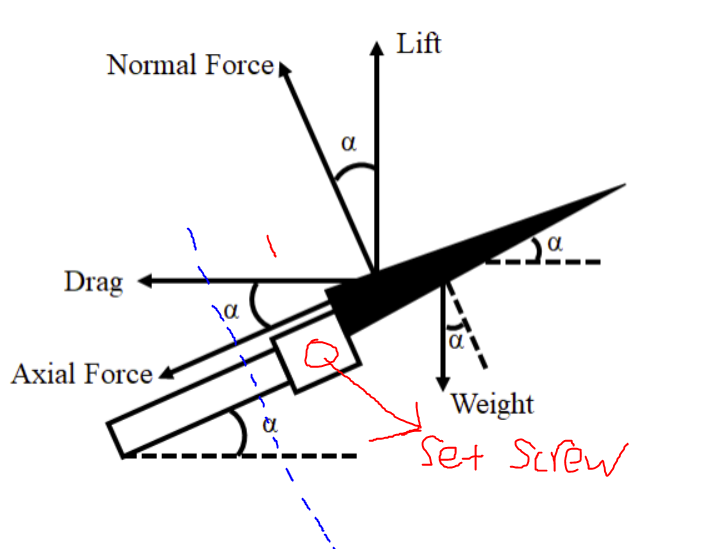

### the pitching moment is measured relative to a point 0.62'' behind the set screw (0.05166667 ft), we can then find the moment arm for the normal force $N$ that caues the pitching moment

In [723]:
df_list[1].columns

Index(['Data Point', 'Corr Factor', 'Length Scale[in]', 'AmbPress[psia]',
       'AmbTemp[R]', 'Density[slug/ft3]', 'Viscosity[slug/ft s]',
       'Motor Speed[RPM]', 'Angle of Attack[deg]', 'Corrected q',
       'Avg Velocity[ft/s]', 'Reynolds number', 'Axial Force[Lbf]',
       'Normal Force[Lbf]', 'Pitching Mom[in-Lbf]', 'Angle of Attack[rad]'],
      dtype='object')

In [724]:
# #first convert in-lbf to ft-lbf
# #the reference origin is the point 0.62'' behind the set screw
# N_arm1 = (df_list[1]['Pitching Mom[in-Lbf]']-df_list[0]['Pitching Mom[in-Lbf]'])*0.083333 / (df_list[1]['Normal Force[Lbf]']-df_list[0]['Normal Force[Lbf]'])
# N_arm2 = (df_list[2]['Pitching Mom[in-Lbf]']-df_list[0]['Pitching Mom[in-Lbf]'])*0.083333 / (df_list[2]['Normal Force[Lbf]']-df_list[0]['Normal Force[Lbf]'])
# N_arm3 = (df_list[3]['Pitching Mom[in-Lbf]']-df_list[0]['Pitching Mom[in-Lbf]'])*0.083333 / (df_list[3]['Normal Force[Lbf]']-df_list[0]['Normal Force[Lbf]'])
# #all measured in ft
# df_list[1]['N_arm[ft]'] = N_arm1
# df_list[2]['N_arm[ft]'] = N_arm2
# df_list[3]['N_arm[ft]'] = N_arm3

In [725]:
# plt.figure(dpi=300);
# sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data = df_list[1],label='Re=19562');
# sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data = df_list[2],label='Re=39194');
# sns.scatterplot(x='Angle of Attack[deg]',y='Moment Coef',data = df_list[3],label='Re=58755');


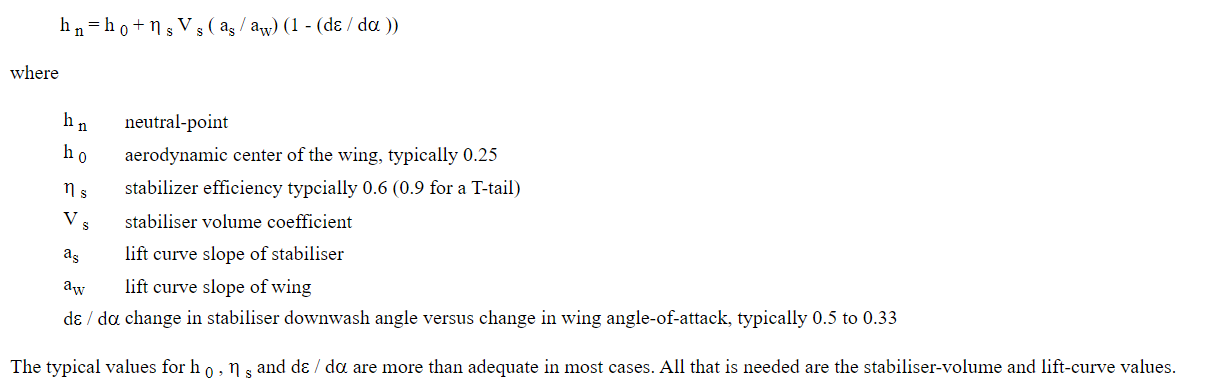

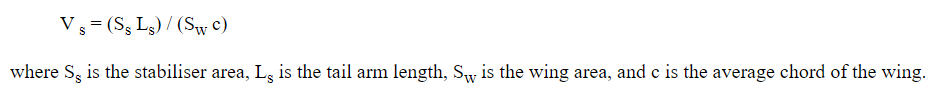

The neutral-point (NP) is the point around which all the aerodynamic forces are balanced

In [726]:
%matplotlib inline
a = S
exp1_off = pd.read_csv('designlab_#1.csv', skiprows=[0,4], skipinitialspace=True)
exp1_40 = pd.read_csv('designlab_#2.csv', skiprows=[0,4], skipinitialspace=True)
exp1_80 = pd.read_csv('designlab_#3.csv', skiprows=[0,4], skipinitialspace=True)
exp1_120 = pd.read_csv('designlab_#4.csv', skiprows=[0,4], skipinitialspace=True)
exp2_off = pd.read_csv('designlab_yaw#1.csv', skiprows=[0,4], skipinitialspace=True)
exp2_50 = pd.read_csv('designlab_yaw#2.csv', skiprows=[0,4], skipinitialspace=True)
exp3_off = pd.read_csv('upsidedown_#1.csv', skiprows=[0,4], skipinitialspace=True)
exp3_80 = pd.read_csv('upsidedown_#1.csv', skiprows=[0,4], skipinitialspace=True)

exp1 = [exp1_40, exp1_80, exp1_120]
exp2 = [exp2_50]
exp3= [exp3_80]

re_40 = int(round(np.mean(exp1_40['Reynolds number']), -2))
re_80 = int(round(np.mean(exp1_80['Reynolds number']), -2))
re_120 = int(round(np.mean(exp1_120['Reynolds number']), -2))

exp1_f_axial_off = exp1_off['Axial Force']
exp1_f_normal_off = exp1_off['Normal Force']



#axial_pos = np.linspace(3, 7, 40)
#moments = np.ndarray((3, len(axial_pos), len(exp1_off['Data Point'])))



In [727]:
# sums = np.ndarray((len(axial_pos)))
# plt.figure(dpi=300)
# for i, pos in enumerate(axial_pos):
#     plt.plot(exp1_off['Angle of Attack'], moments[1][i], label=round(pos,3))
#     sums[i] = np.sum(moments[1][i] + 0.032) 
# plt.xlabel(r'$\alpha$')
# plt.ylabel('Moment $[in-Lbf]$')
# plt.xlim(-5.05,-4.5)
# plt.ylim(0.9,1.1)
# plt.axhline(y=-0.032)
# plt.legend(title='Position from Sting [in]', loc='best', ncol=2)
# plt.savefig('moment.png', bbox_inches='tight', dpi=200)

# print(f'Neutral point: {axial_pos[np.argmin(np.absolute(sums))]}"')

In [728]:
exp1_40.columns

Index(['Data Point', 'Corr Factor', 'Length Scale', 'AmbPress', 'AmbTemp',
       'Density', 'Viscosity', 'Motor Speed', 'Angle of Attack', 'Corrected q',
       'Avg Velocity', 'Reynolds number', 'Axial Force', 'Normal Force',
       'Pitching Mom'],
      dtype='object')

In [729]:
#find neutral point using 3rd data set
stds = []
for i in np.arange(-10,10,0.01):
    Mi = (-exp1_120['Normal Force']-exp1_off['Normal Force'])*(i)+ exp1_120['Pitching Mom']-exp1_off['Pitching Mom']
    s = np.std(Mi)
    stds.append((i,s))
a = min(stds, key=lambda x: x[1])
x_neutral_point = a[0]
x_neutral_point #inches
Mi_3=(-exp1_120['Normal Force']-exp1_off['Normal Force'])*a[0]+ exp1_120['Pitching Mom']-exp1_off['Pitching Mom']
CM3 = Mi_3/(exp1_120['Corrected q']*144*S*mac)
exp1_120['Moment neutral[lb-ft]'] = Mi_3
exp1_120['$C_M$'] = CM3
exp1_120['Neutral_Point[in]'] = x_neutral_point
print(x_neutral_point)

4.589999999999689


In [730]:
#find neutral point using 2nd data set
stds = []
for i in np.arange(-10,10,0.01):
    Mi = (-exp1_80['Normal Force']-exp1_off['Normal Force'])*(i)+ exp1_80['Pitching Mom']-exp1_off['Pitching Mom']
    s = np.std(Mi)
    
    stds.append((i,s))
a = min(stds, key=lambda x: x[1])
x_neutral_point = a[0]
x_neutral_point #inches
Mi_2 = (-exp1_80['Normal Force']-exp1_off['Normal Force'])*a[0]+ exp1_80['Pitching Mom']-exp1_off['Pitching Mom']
CM2 = Mi_2/(exp1_80['Corrected q']*144*S*mac)
exp1_80['Moment neutral[lb-ft]'] = Mi_2
exp1_80['$C_M$'] = CM2
exp1_80['Neutral_Point[in]'] = x_neutral_point

print(x_neutral_point)

4.479999999999691


In [731]:
#find neutral point using 1st data set
stds = []
for i in np.arange(-10,10,0.01):
    Mi = (-exp1_40['Normal Force']-exp1_off['Normal Force'])*(i)+ exp1_40['Pitching Mom']-exp1_off['Pitching Mom']
    s = np.std(Mi)
    stds.append((i,s))
a = min(stds, key=lambda x: x[1])
x_neutral_point = a[0]
x_neutral_point #inches
Mi_1 = (-exp1_40['Normal Force']-exp1_off['Normal Force'])*a[0]+ exp1_40['Pitching Mom']-exp1_off['Pitching Mom']
CM1 = Mi_1/(exp1_40['Corrected q']*144*S*mac)
exp1_40['$C_M$']=CM1
exp1_40['Moment neutral[lb]'] = Mi_1
exp1_40['Neutral Point[in]'] = x_neutral_point
print(x_neutral_point)

3.889999999999704


In [732]:
#find neutral point using Yaw data set
stds = []
for i in np.arange(-10,10,0.01):
    Mi = -exp2_50['Normal Force']*(i)+ exp2_50['Pitching Mom']
    s = np.std(Mi)
    stds.append((i,s))
a = min(stds, key=lambda x: x[1])
x_neutral_point = a[0]
x_neutral_point #inches
Myaw = -exp2_50['Normal Force']*a[0]+ exp2_50['Pitching Mom']
CM_yaw = Myaw /(exp2_50['Corrected q']*144*S*mac)
exp2_50['Moment neutral[lb-ft]'] = Myaw
exp2_50['$C_M_{yaw}$'] = CM_yaw
exp2_50 ['Neutral Point[in]'] = x_neutral_point
print(x_neutral_point)

4.789999999999685


In [733]:
#find neutral point using Upside down data
stds = []
for i in np.arange(-10,10,0.01):
    Mi = -exp3_80['Normal Force']*(i)+ exp3_80['Pitching Mom']
    s = np.std(Mi)
    stds.append((i,s))
a = min(stds, key=lambda x: x[1])
x_neutral_point = a[0]
x_neutral_point #inches
M_up_down = -exp3_80['Normal Force']*a[0]+ exp3_80['Pitching Mom']
CM_updown = M_up_down /(exp2_50['Corrected q']*144*S*mac)
exp3_80['Moment neutral[lb-ft]'] = M_up_down
exp3_80['$C_M$'] = CM_updown
exp3_80['Neutral Point[in]'] = x_neutral_point
print(x_neutral_point)

3.219999999999718


In [734]:
exp1_40.columns

Index(['Data Point', 'Corr Factor', 'Length Scale', 'AmbPress', 'AmbTemp',
       'Density', 'Viscosity', 'Motor Speed', 'Angle of Attack', 'Corrected q',
       'Avg Velocity', 'Reynolds number', 'Axial Force', 'Normal Force',
       'Pitching Mom', '$C_M$', 'Moment neutral[lb]', 'Neutral Point[in]'],
      dtype='object')

In [735]:
np.mean(exp1_80['Reynolds number'])

39194.334263392855

In [736]:
np.mean(exp1_40['Reynolds number'])

19562.798828125

In [737]:
np.mean(exp1_120['Reynolds number'])

58755.133091517855

In [738]:
S

0.0604

In [739]:
q4 = np.ndarray((3, 6, len(exp1_off['Data Point'])))
q5 = np.ndarray((1, 6, len(exp2_off['Data Point'])))
q6 = np.ndarray((1, 6, len(exp3_off['Data Point'])))

In [740]:
for j, speed in enumerate(exp1): #normally oriented data
    for i, alpha in enumerate(speed['Angle of Attack']):
        f_axial = speed['Axial Force'][i] - exp1_f_axial_off[i]
        f_normal = speed['Normal Force'][i] - exp1_f_normal_off[i]

        f_lift = f_normal*np.cos(np.deg2rad(alpha)) - f_axial*np.sin(np.deg2rad(alpha))
        speed['Lift[lbf]'] = f_lift
        f_drag = f_normal*np.sin(np.deg2rad(alpha)) + f_axial*np.cos(np.deg2rad(alpha))
        speed['Drag[lbf]'] = f_drag

        l_d = f_lift/f_drag
        speed['$L/D$'] = l_d
        

        rho = speed['Density'][i]
        v = speed['Avg Velocity'][i]
        
        c_l = (2 * f_lift)/(rho * v**2 * S)
        speed['$C_L$'] = c_l
        c_d = (2 * f_drag)/(rho * v**2 * S)
        speed['$C_D$'] = c_d
        

        c_l_32_c_d = (c_l**(3/2))/c_d
        speed['$C_L^{3/2} / C_D$']=c_l_32_c_d 

        m_sting = speed['Pitching Mom'][i]
        

        cen_press = m_sting/f_normal

        for k, x in enumerate(axial_pos):
            mom = f_normal*(x) - m_sting
            moments[j][k][i] = mom

        q4[j][0][i] = alpha
        q4[j][1][i] = l_d
        q4[j][2][i] = c_l_32_c_d
        q4[j][3][i] = c_l
        q4[j][4][i] = c_d
        q4[j][5][i] = cen_press

#moments


D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [741]:
for j, speed in enumerate(exp2): #yaw data
    for i, alpha in enumerate(speed['Angle of Attack']):
        f_axial = speed['Axial Force'][i] - exp1_f_axial_off[i]
        f_normal = speed['Normal Force'][i] - exp1_f_normal_off[i]

        f_lift = f_normal*np.cos(np.deg2rad(alpha)) - f_axial*np.sin(np.deg2rad(alpha))
        speed['Yaw Force[lbf]'] = f_lift
        f_drag = f_normal*np.sin(np.deg2rad(alpha)) + f_axial*np.cos(np.deg2rad(alpha))
        speed['Drag[lbf]'] = f_drag

        l_d = f_lift/f_drag
        speed['$Yaw/D$'] = l_d
        

        rho = speed['Density'][i]
        v = speed['Avg Velocity'][i]
        
        c_l = (2 * f_lift)/(rho * v**2 * S)
        speed['$C_Yaw$'] = c_l
        c_d = (2 * f_drag)/(rho * v**2 * S)
        speed['$C_D$'] = c_d
        

        c_l_32_c_d = (c_l**(3/2))/c_d
        speed['$C_Yaw^{3/2} / C_D$']=c_l_32_c_d 

        m_sting = speed['Pitching Mom'][i]
        

        cen_press = m_sting/f_normal

        for k, x in enumerate(axial_pos):
            mom = f_normal*(x) - m_sting
            moments[j][k][i] = mom

        q5[j][0][i] = alpha
        q5[j][1][i] = l_d
        q5[j][2][i] = c_l_32_c_d
        q5[j][3][i] = c_l
        q5[j][4][i] = c_d
        q5[j][5][i] = cen_press


In [742]:
for j, speed in enumerate(exp3): #upside-down data
    for i, alpha in enumerate(speed['Angle of Attack']):
        f_axial = speed['Axial Force'][i] - exp1_f_axial_off[i]
        f_normal = speed['Normal Force'][i] - exp1_f_normal_off[i]

        f_lift = f_normal*np.cos(np.deg2rad(alpha)) - f_axial*np.sin(np.deg2rad(alpha))
        speed['Lift[lbf]'] = f_lift
        f_drag = f_normal*np.sin(np.deg2rad(alpha)) + f_axial*np.cos(np.deg2rad(alpha))
        speed['Drag[lbf]'] = f_drag

        l_d = f_lift/f_drag
        speed['$L/D$'] = l_d
        

        rho = speed['Density'][i]
        v = speed['Avg Velocity'][i]
        
        c_l = (2 * f_lift)/(rho * v**2 * S)
        speed['$C_L$'] = c_l
        c_d = (2 * f_drag)/(rho * v**2 * S)
        speed['$C_D$'] = c_d
        

        c_l_32_c_d = (c_l**(3/2))/c_d
        speed['$C_L^{3/2} / C_D$']=c_l_32_c_d 

        m_sting = speed['Pitching Mom'][i]
        

        cen_press = m_sting/f_normal

        for k, x in enumerate(axial_pos):
            mom = f_normal*(x) - m_sting
            moments[j][k][i] = mom

        q6[j][0][i] = alpha
        q6[j][1][i] = l_d
        q6[j][2][i] = c_l_32_c_d
        q6[j][3][i] = c_l
        q6[j][4][i] = c_d
        q6[j][5][i] = cen_press


In [744]:
exp1_120.to_csv('df3_roll0.csv')
exp1_80.to_csv('df_2_roll0.csv')
exp1_40.to_csv('df_1_roll0.csv')
exp2_50.to_csv('df_4_roll90.csv')
exp3_80.to_csv('df_5_roll180.csv')


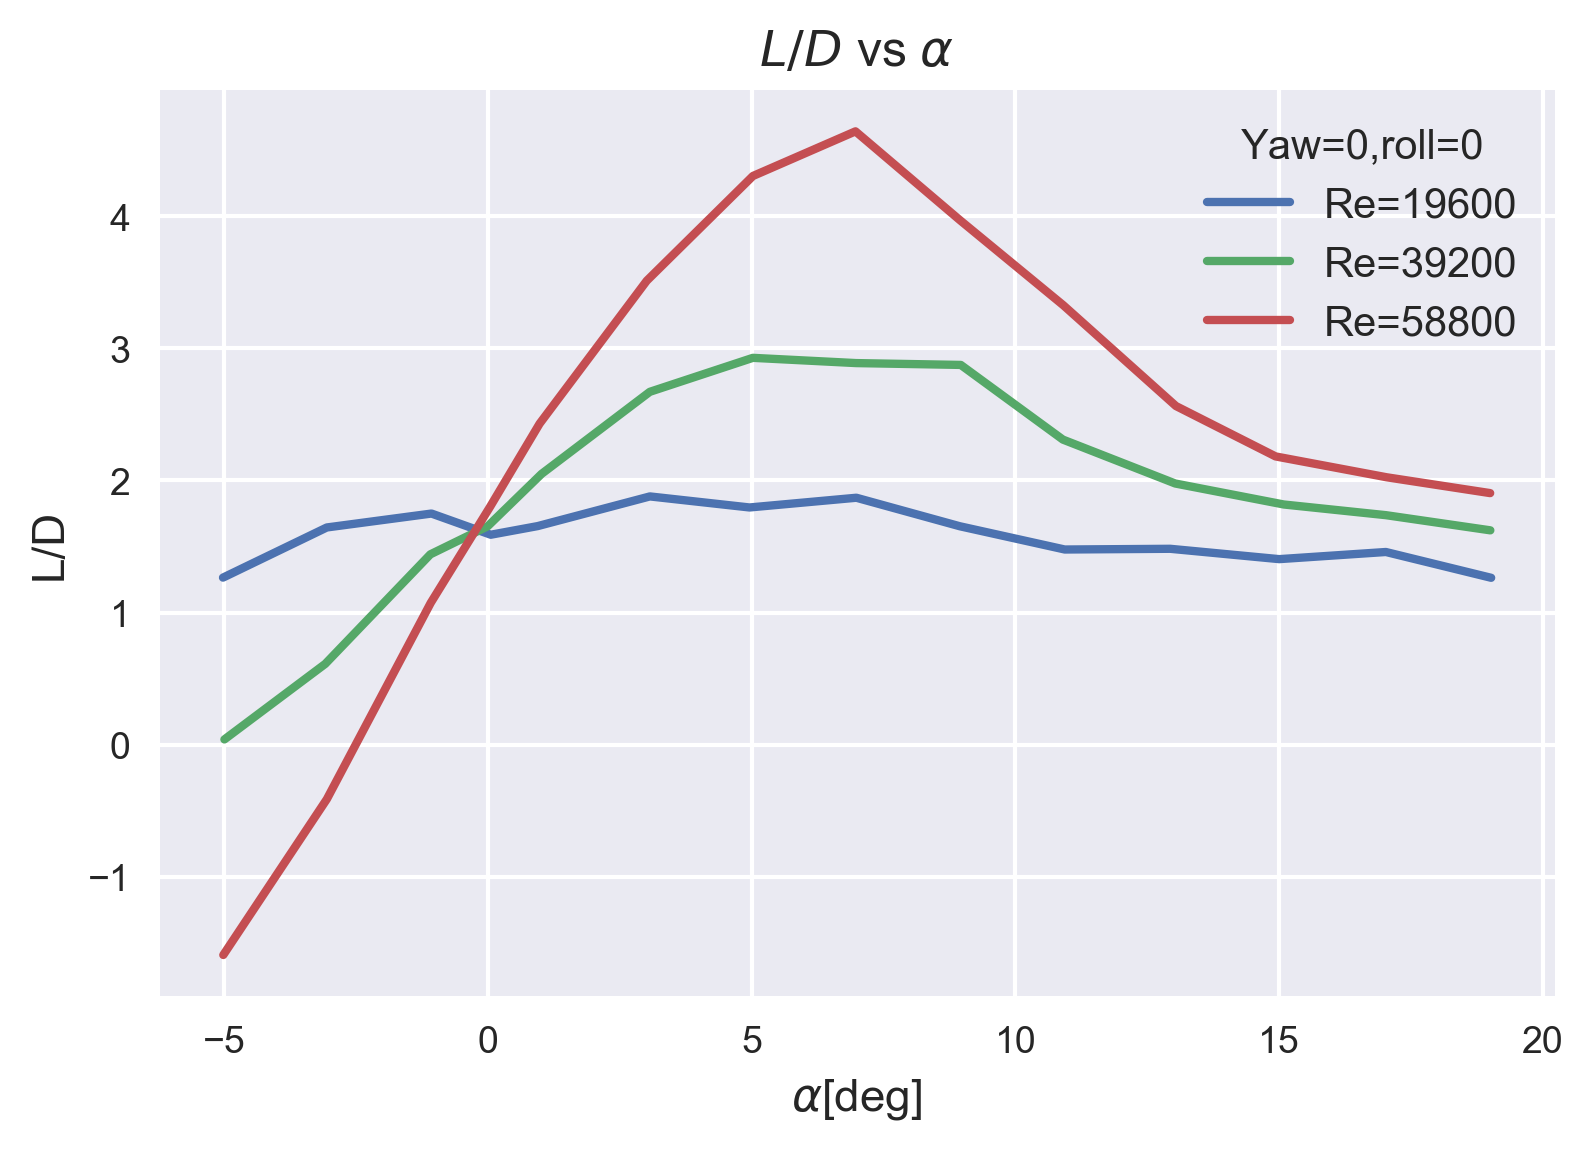

In [745]:
#l/d vs aoa, first experiment when roll = 0
plt.figure(dpi=300)
plt.plot(q4[0][0], q4[0][1], label='Re='+str(re_40))
plt.plot(q4[1][0], q4[1][1], label='Re='+str(re_80))
plt.plot(q4[2][0], q4[2][1], label='Re='+str(re_120))
plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('L/D')
plt.title('$L/D$ vs 'r'$\alpha$')
plt.legend(title='Yaw=0,roll=0')
plt.savefig('q4_l_d.png', bbox_inches='tight', dpi=200)



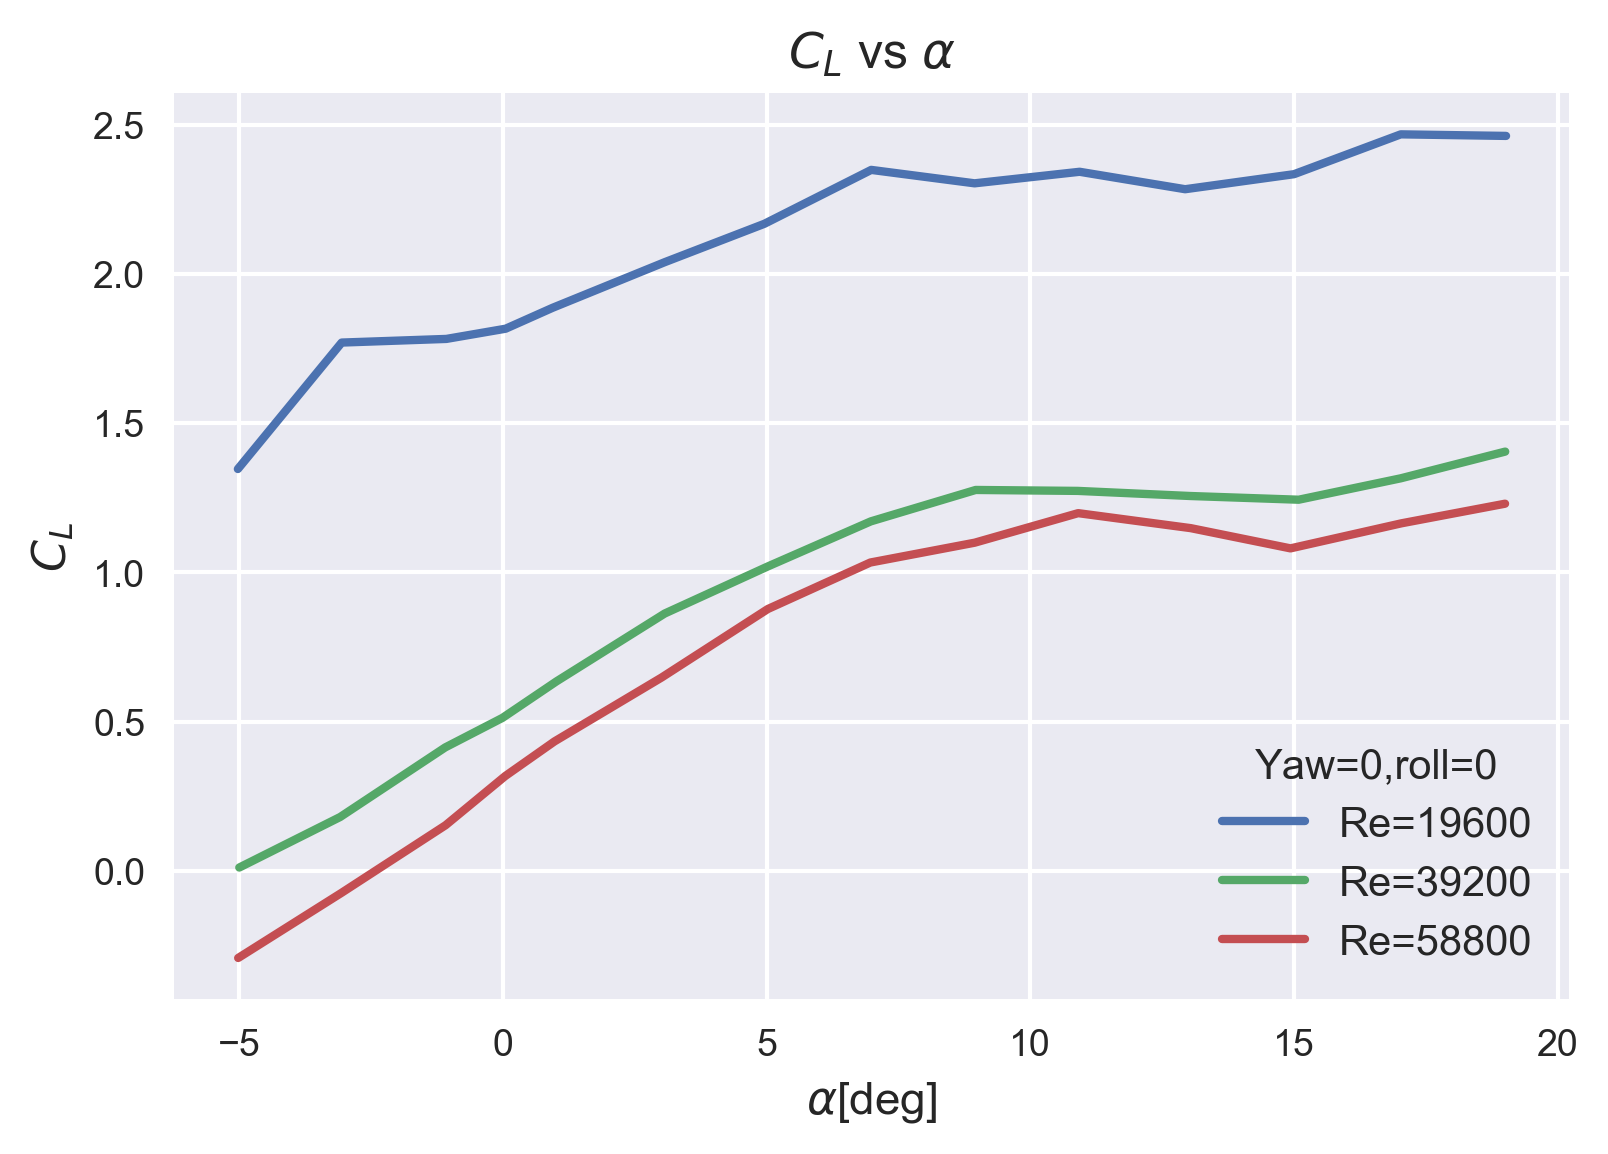

In [746]:
#c_L vs aoa
plt.figure(dpi=300)
plt.plot(q4[0][0], q4[0][3], label='Re='+str(re_40))
plt.plot(q4[1][0], q4[1][3], label='Re='+str(re_80))
plt.plot(q4[2][0], q4[2][3], label='Re='+str(re_120))
plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_L$')
plt.title('$C_L$ vs 'r'$\alpha$')
plt.legend(title='Yaw=0,roll=0')
plt.savefig('q4_c_l.png', bbox_inches='tight', dpi=200)



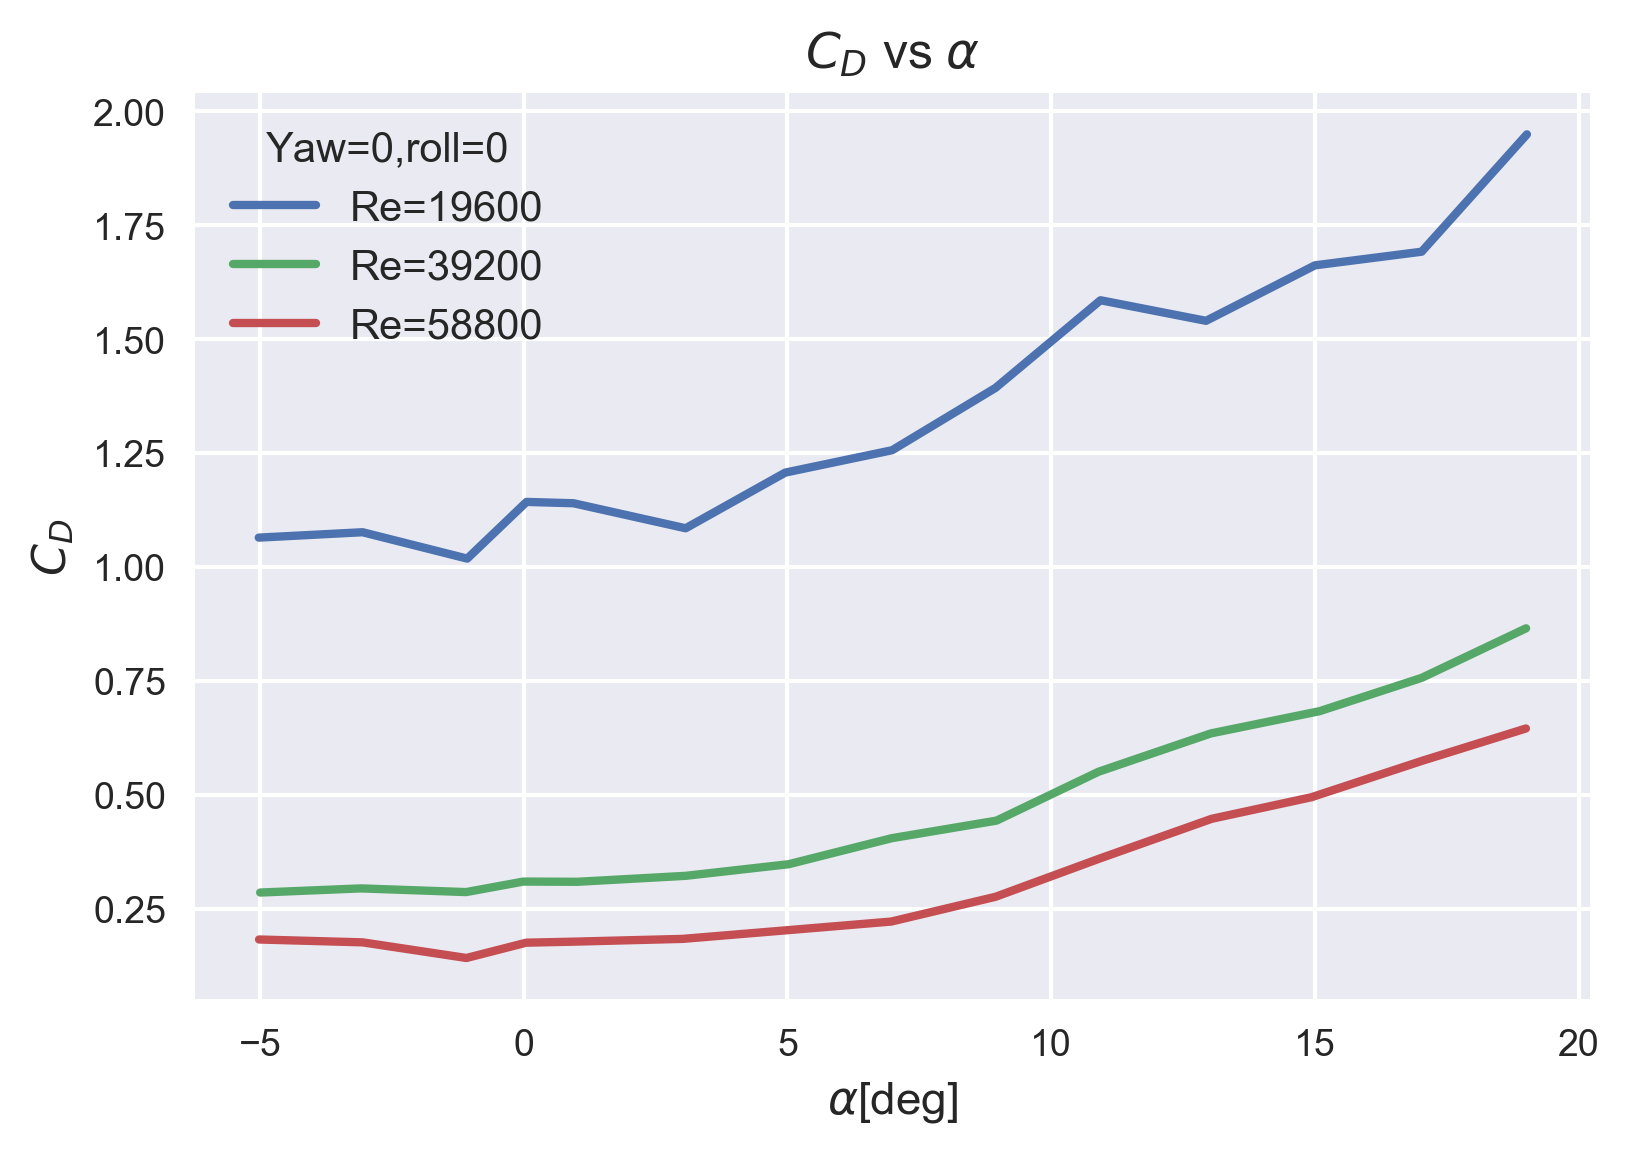

In [747]:
#cd vs alpha
plt.figure(dpi=300)
plt.plot(q4[0][0], q4[0][4], label='Re='+str(re_40))
plt.plot(q4[1][0], q4[1][4], label='Re='+str(re_80))
plt.plot(q4[2][0], q4[2][4], label='Re='+str(re_120))
plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_D$')
plt.title('$C_D$ vs 'r'$\alpha$')
plt.legend(title='Yaw=0,roll=0')
plt.savefig('q4_c_d.png', bbox_inches='tight', dpi=200)



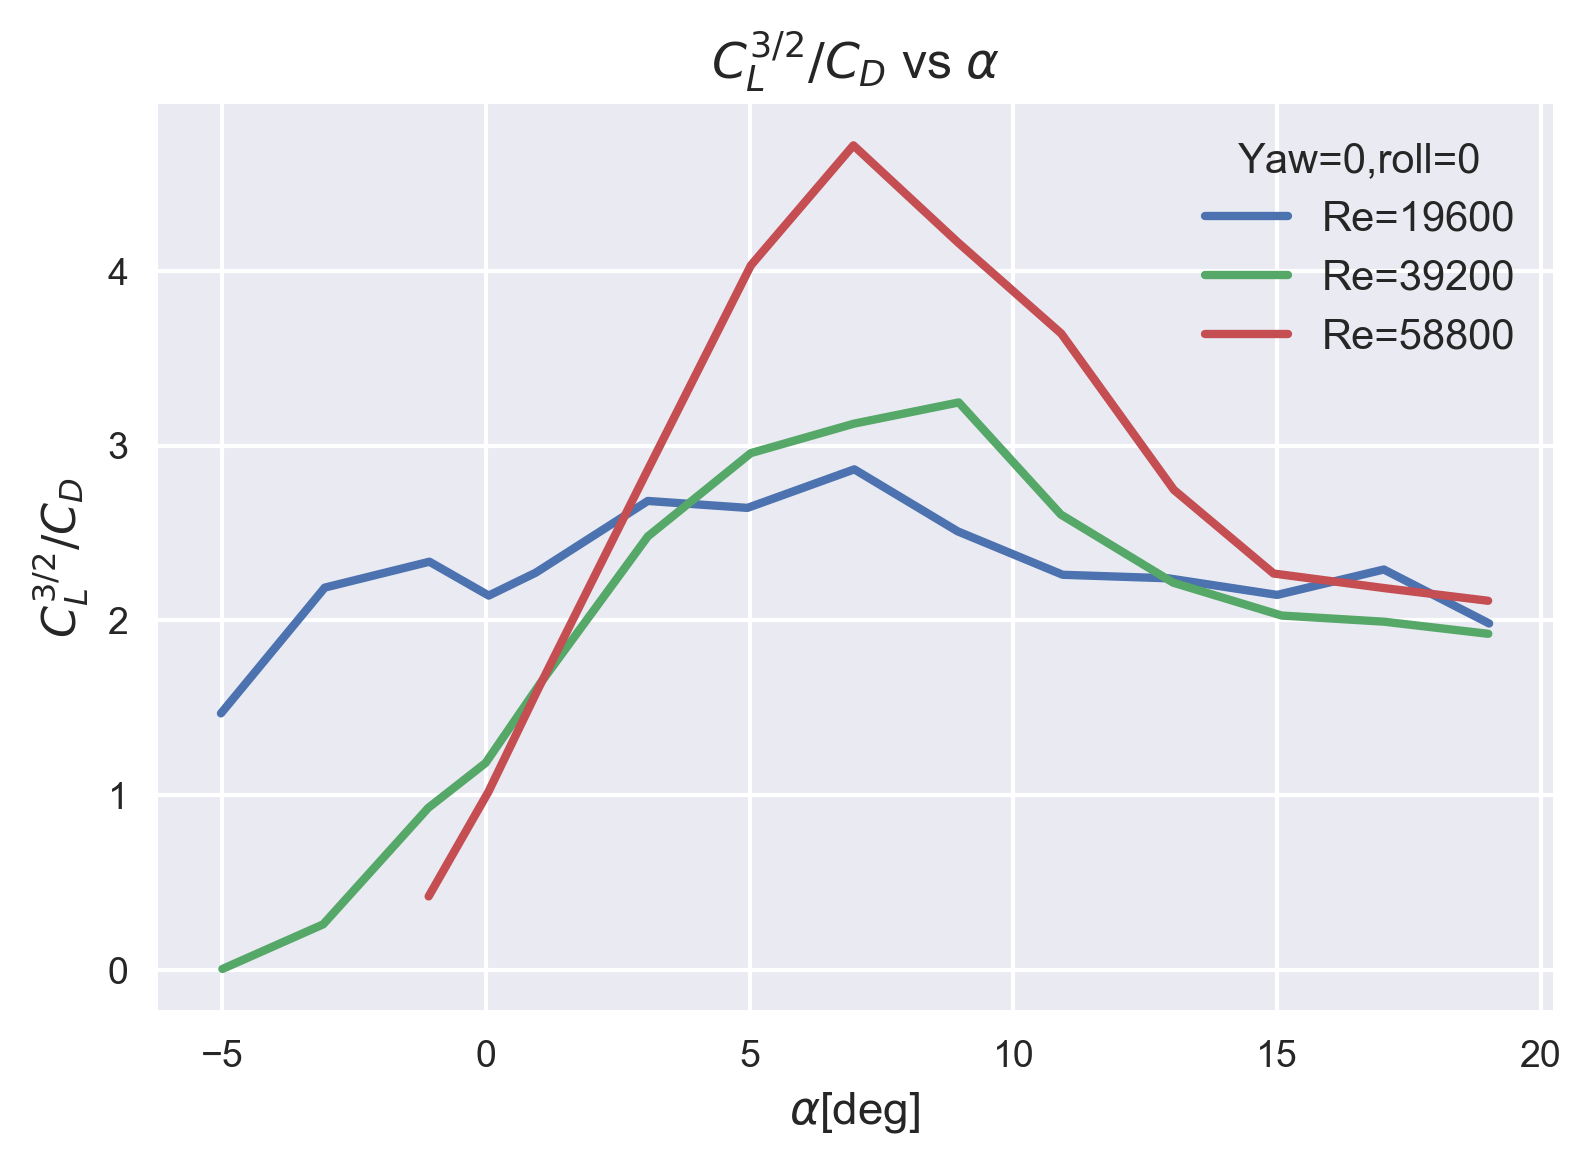

In [748]:
#cl3/2 /cd vs alpha
plt.figure(dpi=300)
plt.plot(q4[0][0], q4[0][2], label='Re='+str(re_40))
plt.plot(q4[1][0], q4[1][2], label='Re='+str(re_80))
plt.plot(q4[2][0], q4[2][2], label='Re='+str(re_120))
plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_L^{3/2} / C_D$')
plt.title('$C_L^{3/2} / C_D$ vs 'r'$\alpha$' )
plt.legend(title='Yaw=0,roll=0')
plt.savefig('q4_c_l32.png', bbox_inches='tight', dpi=200)



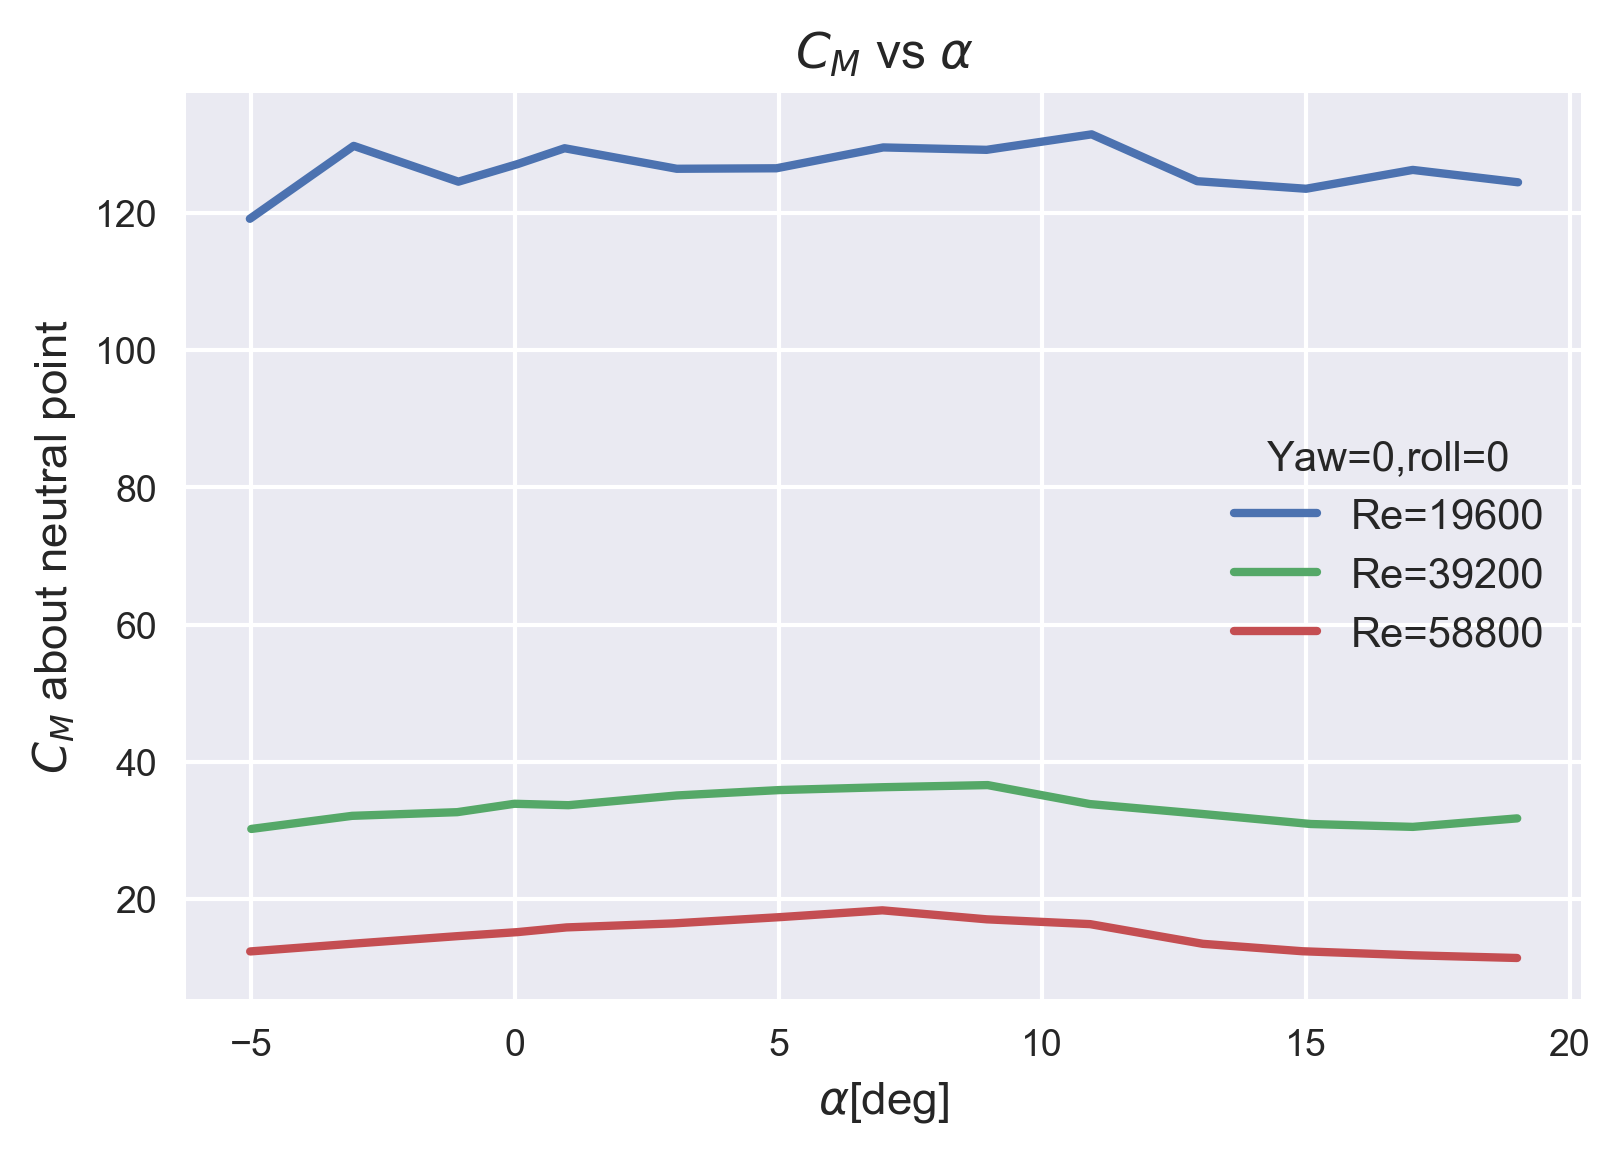

In [749]:
#pitching mom about sting 
plt.figure(dpi=300)
plt.plot(q4[0][0], CM1, label='Re='+str(re_40))
plt.plot(q4[1][0], CM2, label='Re='+str(re_80))
plt.plot(q4[2][0], CM3, label='Re='+str(re_120))
plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_M$ about neutral point')
plt.title('$C_M$ vs 'r'$\alpha$')
plt.legend(title='Yaw=0,roll=0')
plt.savefig('q4_m_sting.png', bbox_inches='tight', dpi=200)



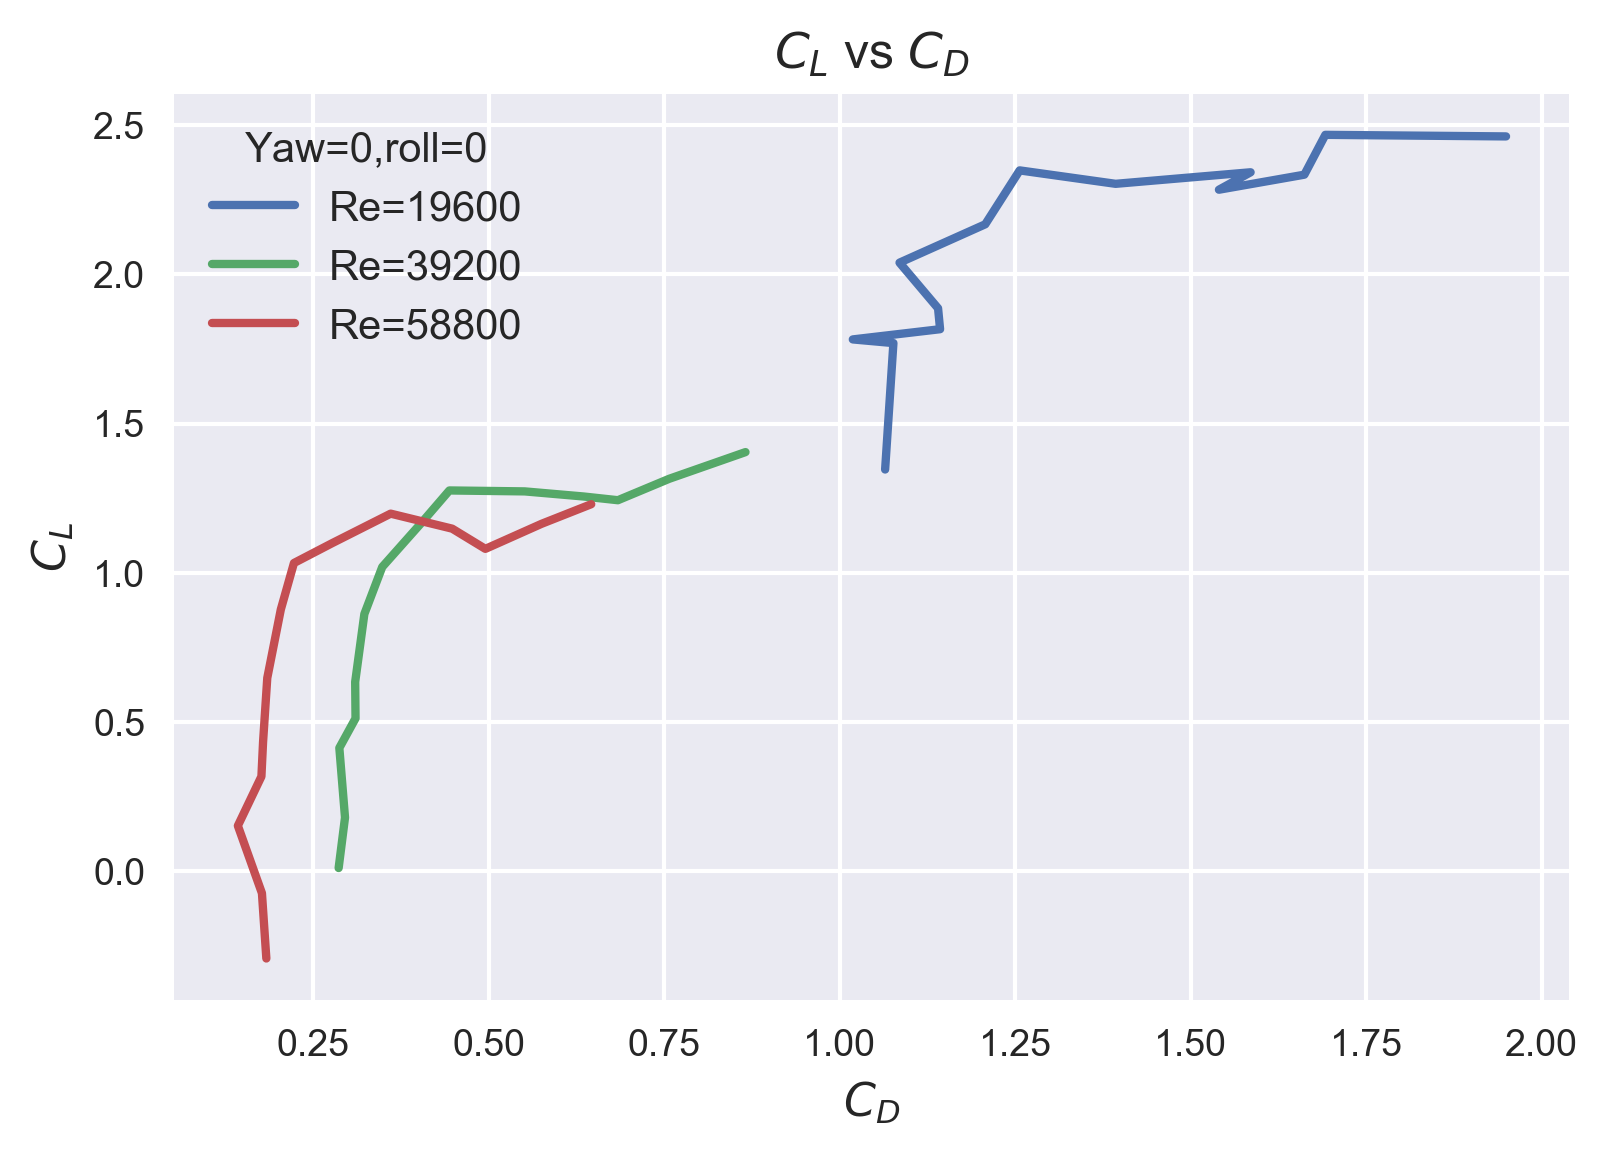

In [750]:
#drag polar
plt.figure(dpi=300)
plt.plot(q4[0][4], q4[0][3], label='Re='+str(re_40))
plt.plot(q4[1][4], q4[1][3], label='Re='+str(re_80))
plt.plot(q4[2][4], q4[2][3], label='Re='+str(re_120))
plt.xlabel('$C_D$')
plt.ylabel('$C_L$')
plt.title('$C_L$ vs $C_D$')
plt.legend(title='Yaw=0,roll=0')
plt.savefig('q4_drag_polar.png', bbox_inches='tight', dpi=200)

In [751]:
exp2_50.columns

Index(['Data Point', 'Corr Factor', 'Length Scale', 'AmbPress', 'AmbTemp',
       'Density', 'Viscosity', 'Motor Speed', 'Angle of Attack', 'Corrected q',
       'Avg Velocity', 'Reynolds number', 'Axial Force', 'Normal Force',
       'Pitching Mom', 'Moment neutral[lb-ft]', '$C_M_{yaw}$',
       'Neutral Point[in]', 'Yaw Force[lbf]', 'Drag[lbf]', '$Yaw/D$',
       '$C_Yaw$', '$C_D$', '$C_Yaw^{3/2} / C_D$'],
      dtype='object')

In [752]:
re_50 = np.mean(exp2_50['Reynolds number'])
re_80 = np.mean(exp3_80['Reynolds number'])

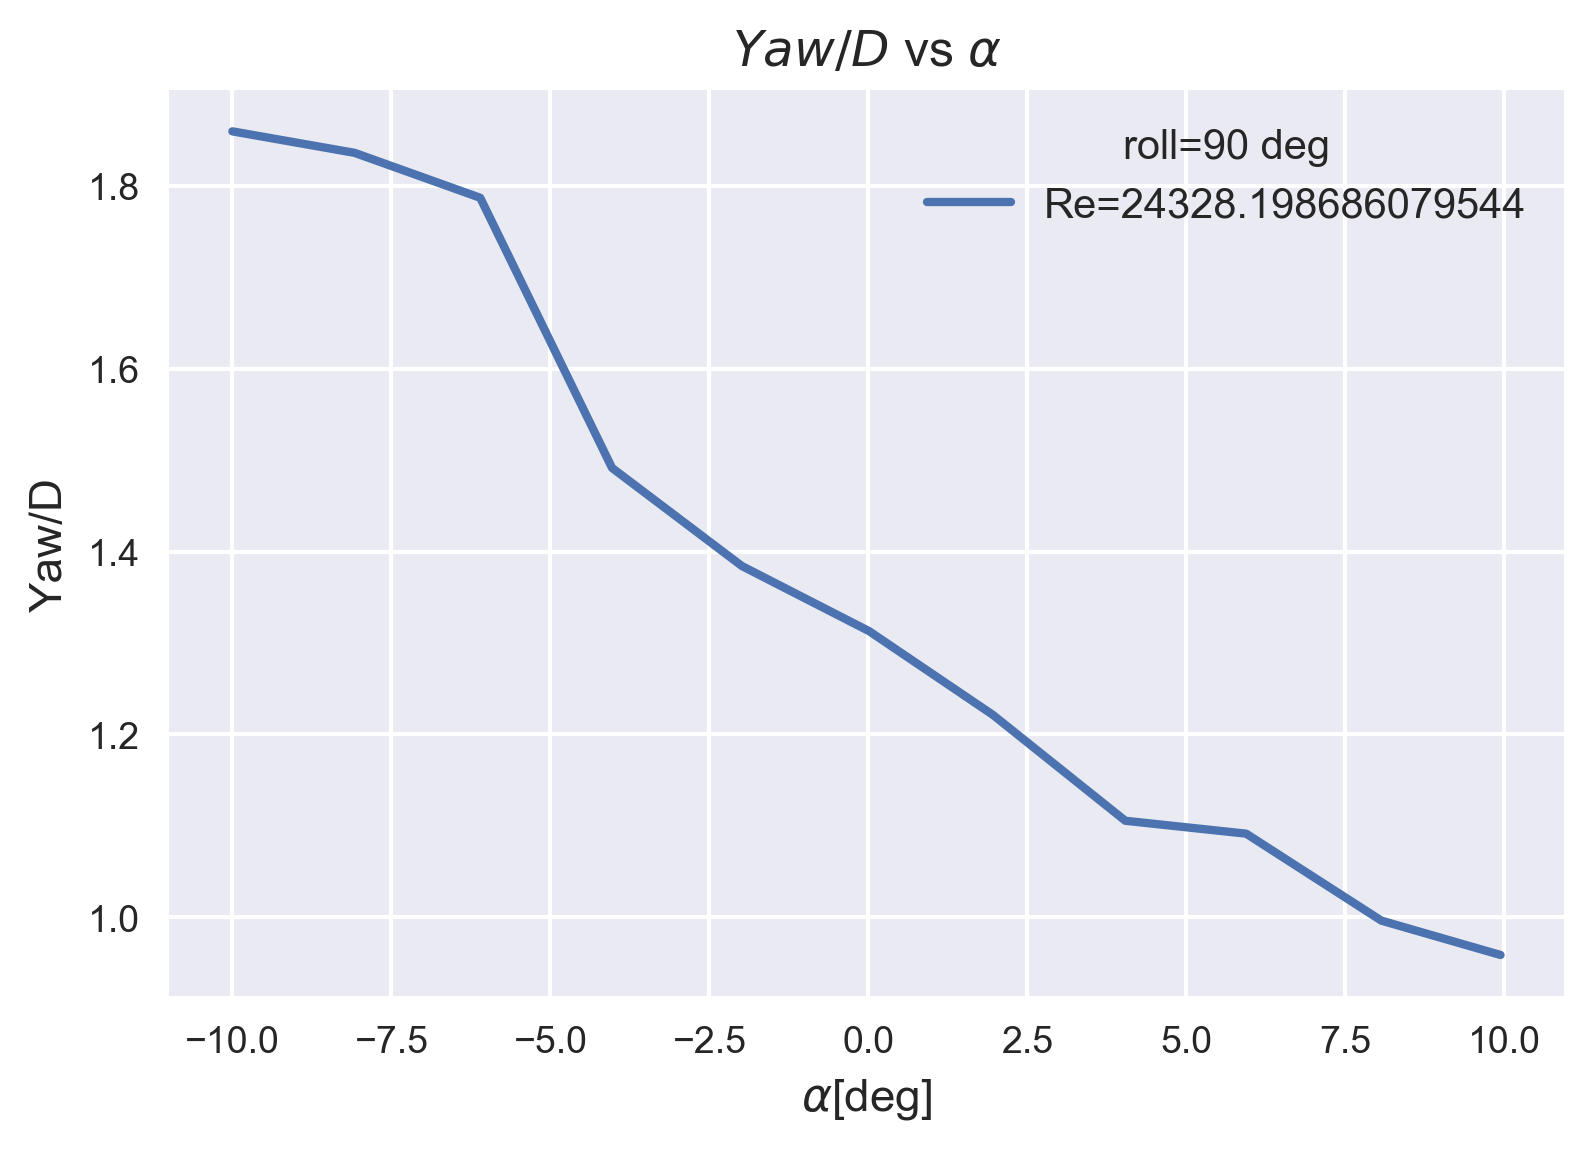

In [753]:
#yaw data:
#Yaw/d vs aoa
plt.figure(dpi=300)
plt.plot(q5[0][0], q5[0][1], label='Re='+str(re_50))

plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('Yaw/D')
plt.title('$Yaw/D$ vs 'r'$\alpha$')
plt.legend(title='roll=90 deg')
plt.savefig('q5_l_d.png', bbox_inches='tight', dpi=200)


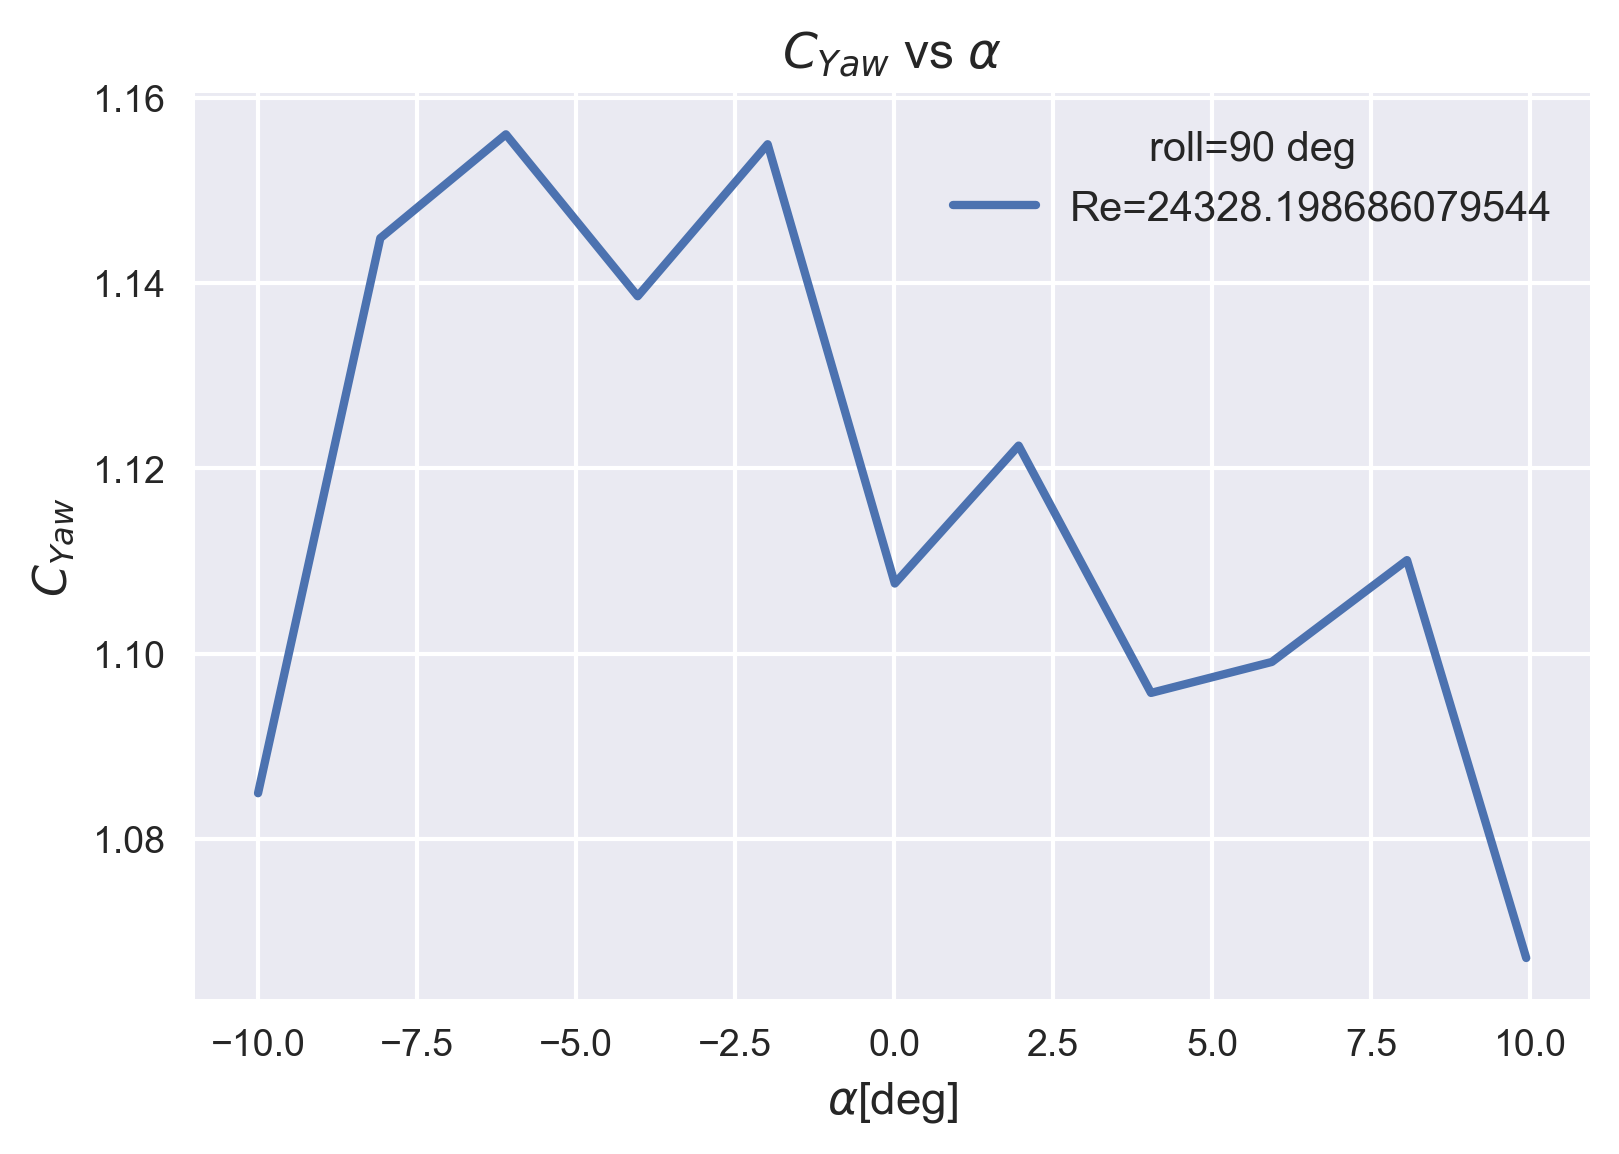

In [754]:
#c_L vs aoa
plt.figure(dpi=300)
plt.plot(q5[0][0], q5[0][3], label='Re='+str(re_50))
plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_{Yaw}$')
plt.title('$C_{Yaw}$ vs 'r'$\alpha$')
plt.legend(title='roll=90 deg')
plt.savefig('q5_c_Yaw.png', bbox_inches='tight', dpi=200)


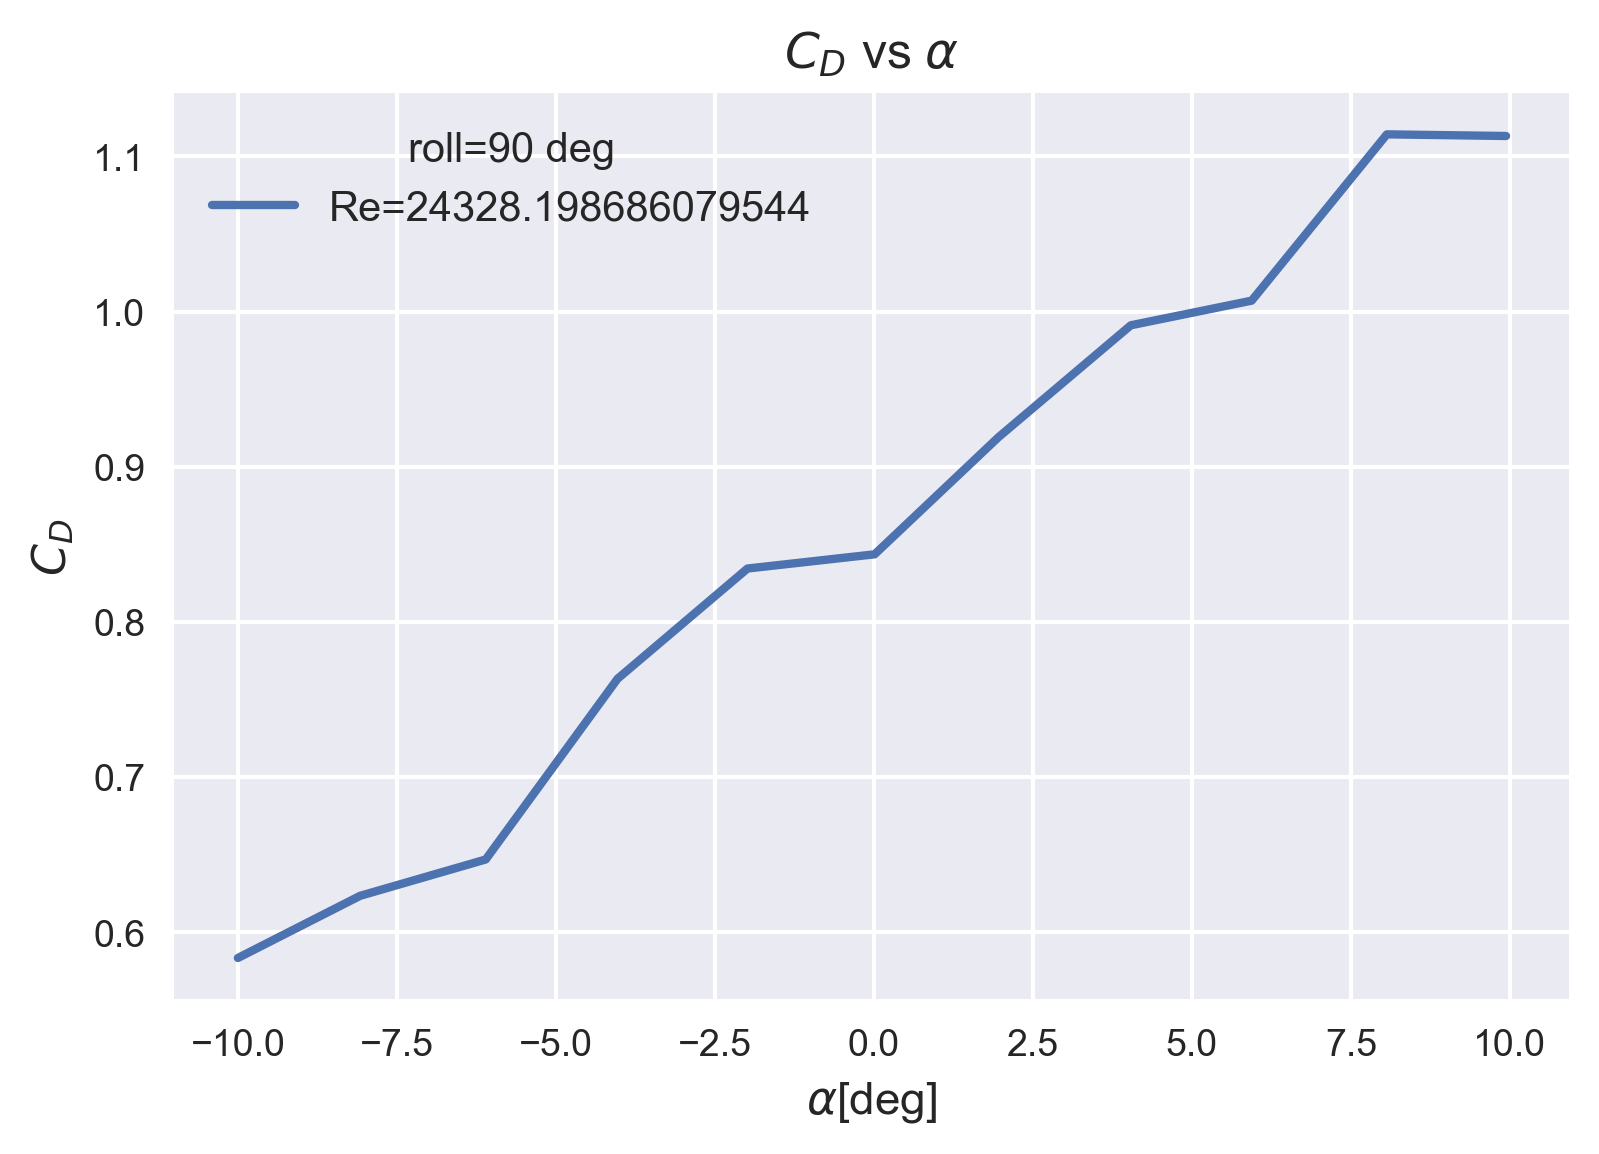

In [755]:
#cd vs alpha
plt.figure(dpi=300)
plt.plot(q5[0][0], q5[0][4], label='Re='+str(re_50))

plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_D$')
plt.title('$C_D$ vs 'r'$\alpha$')
plt.legend(title='roll=90 deg')
plt.savefig('q5_c_d.png', bbox_inches='tight', dpi=200)


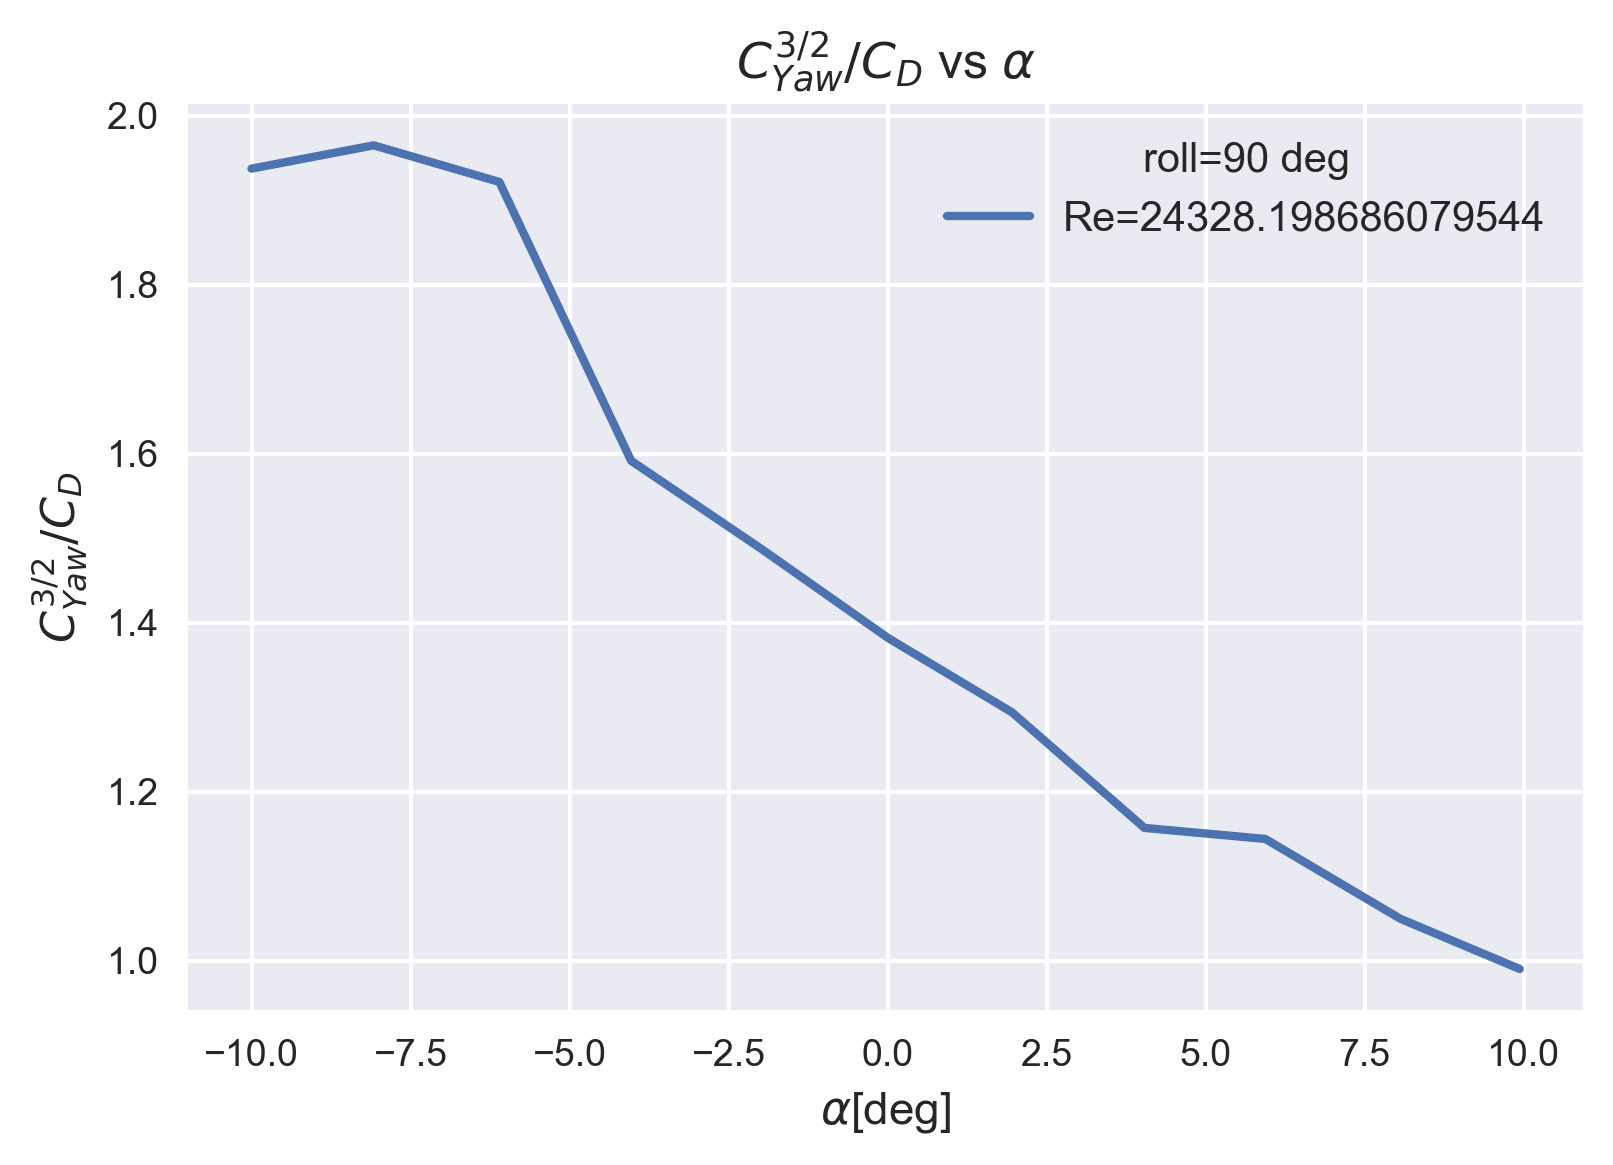

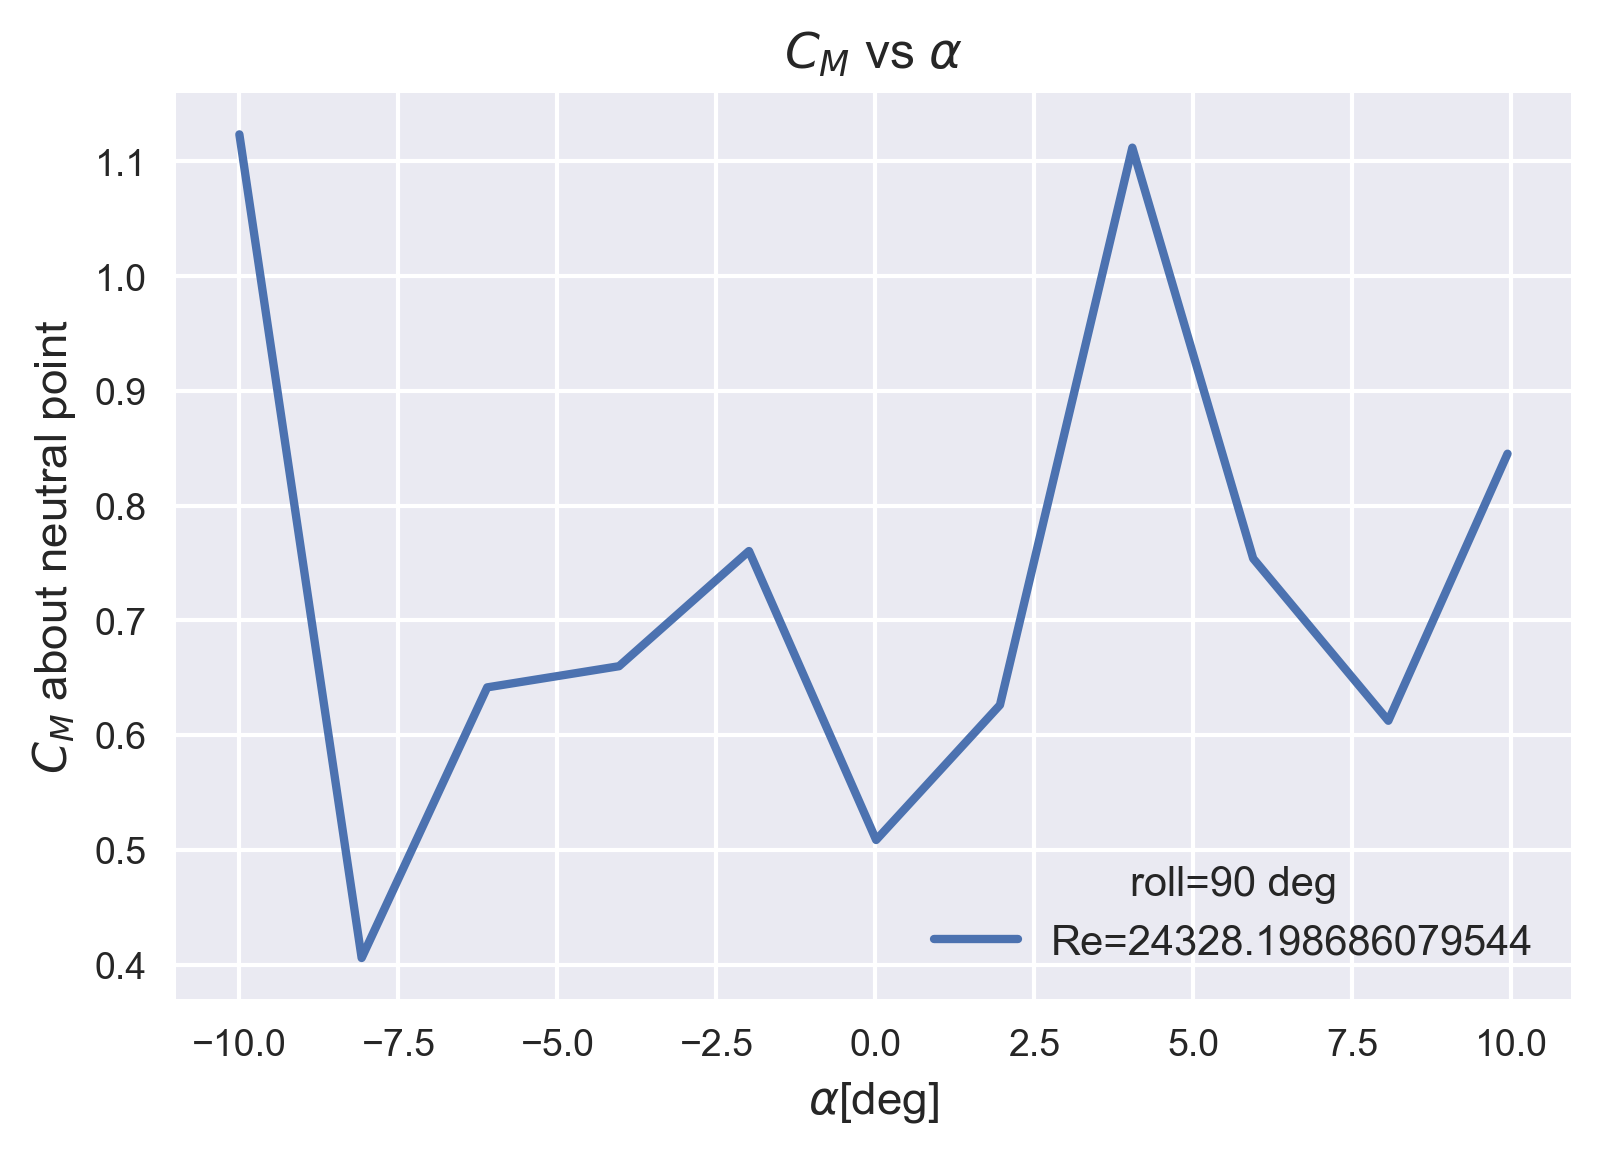

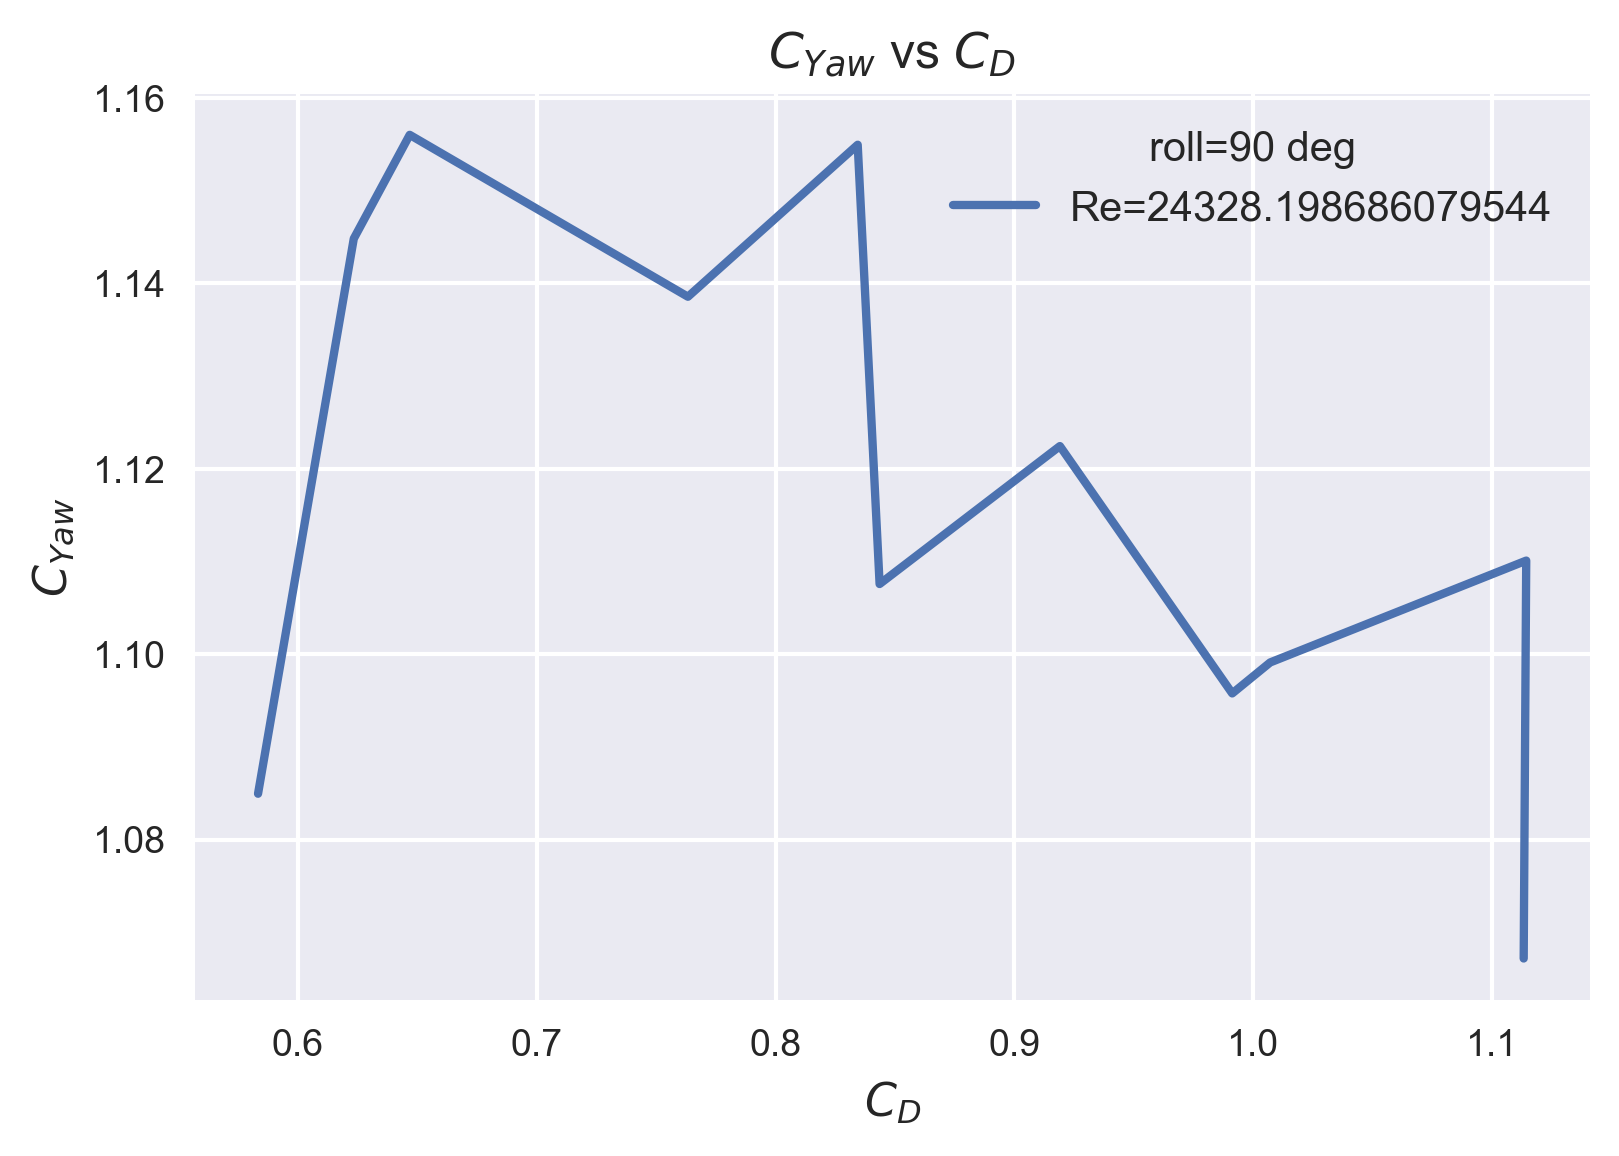

In [756]:
#c_yaw^(3/2) /cd vs alpha
plt.figure(dpi=300)
plt.plot(q5[0][0], q5[0][2], label='Re='+str(re_50))

plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_{Yaw}^{3/2} / C_D$')
plt.title('$C_{Yaw}^{3/2} / C_D$ vs 'r'$\alpha$' )
plt.legend(title='roll=90 deg')
plt.savefig('q5_c_l_32.png', bbox_inches='tight', dpi=200)

#C_M
plt.figure(dpi=300)
plt.plot(q5[0][0], CM_yaw ,label='Re='+str(re_50))
plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_M$ about neutral point')
plt.title('$C_M$ vs 'r'$\alpha$')
plt.legend(title='roll=90 deg')
plt.savefig('q5_C_M.png', bbox_inches='tight', dpi=200)

#drag polar
plt.figure(dpi=300)
plt.plot(q5[0][4], q5[0][3], label='Re='+str(re_50))
plt.xlabel('$C_D$')
plt.ylabel('$C_{Yaw}$')
plt.title('$C_{Yaw}$ vs $C_D$')
plt.legend(title='roll=90 deg')
plt.savefig('q5_drag_polar.png', bbox_inches='tight', dpi=200)

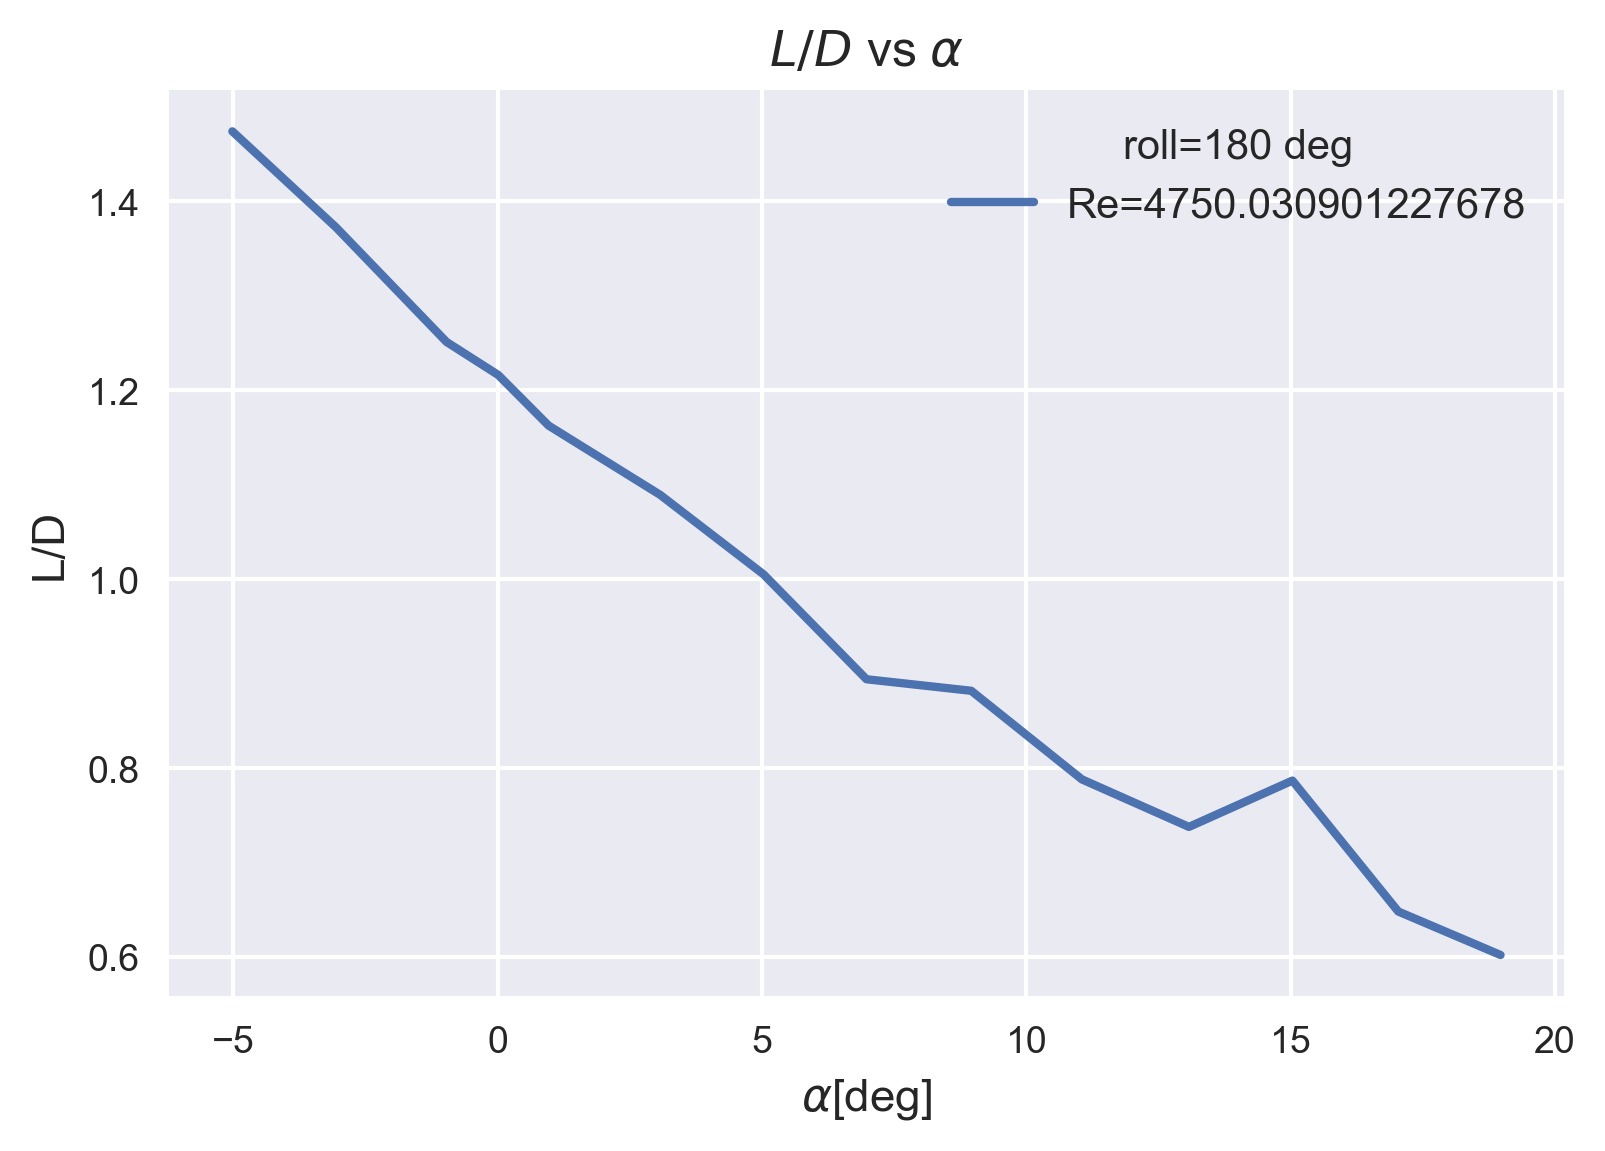

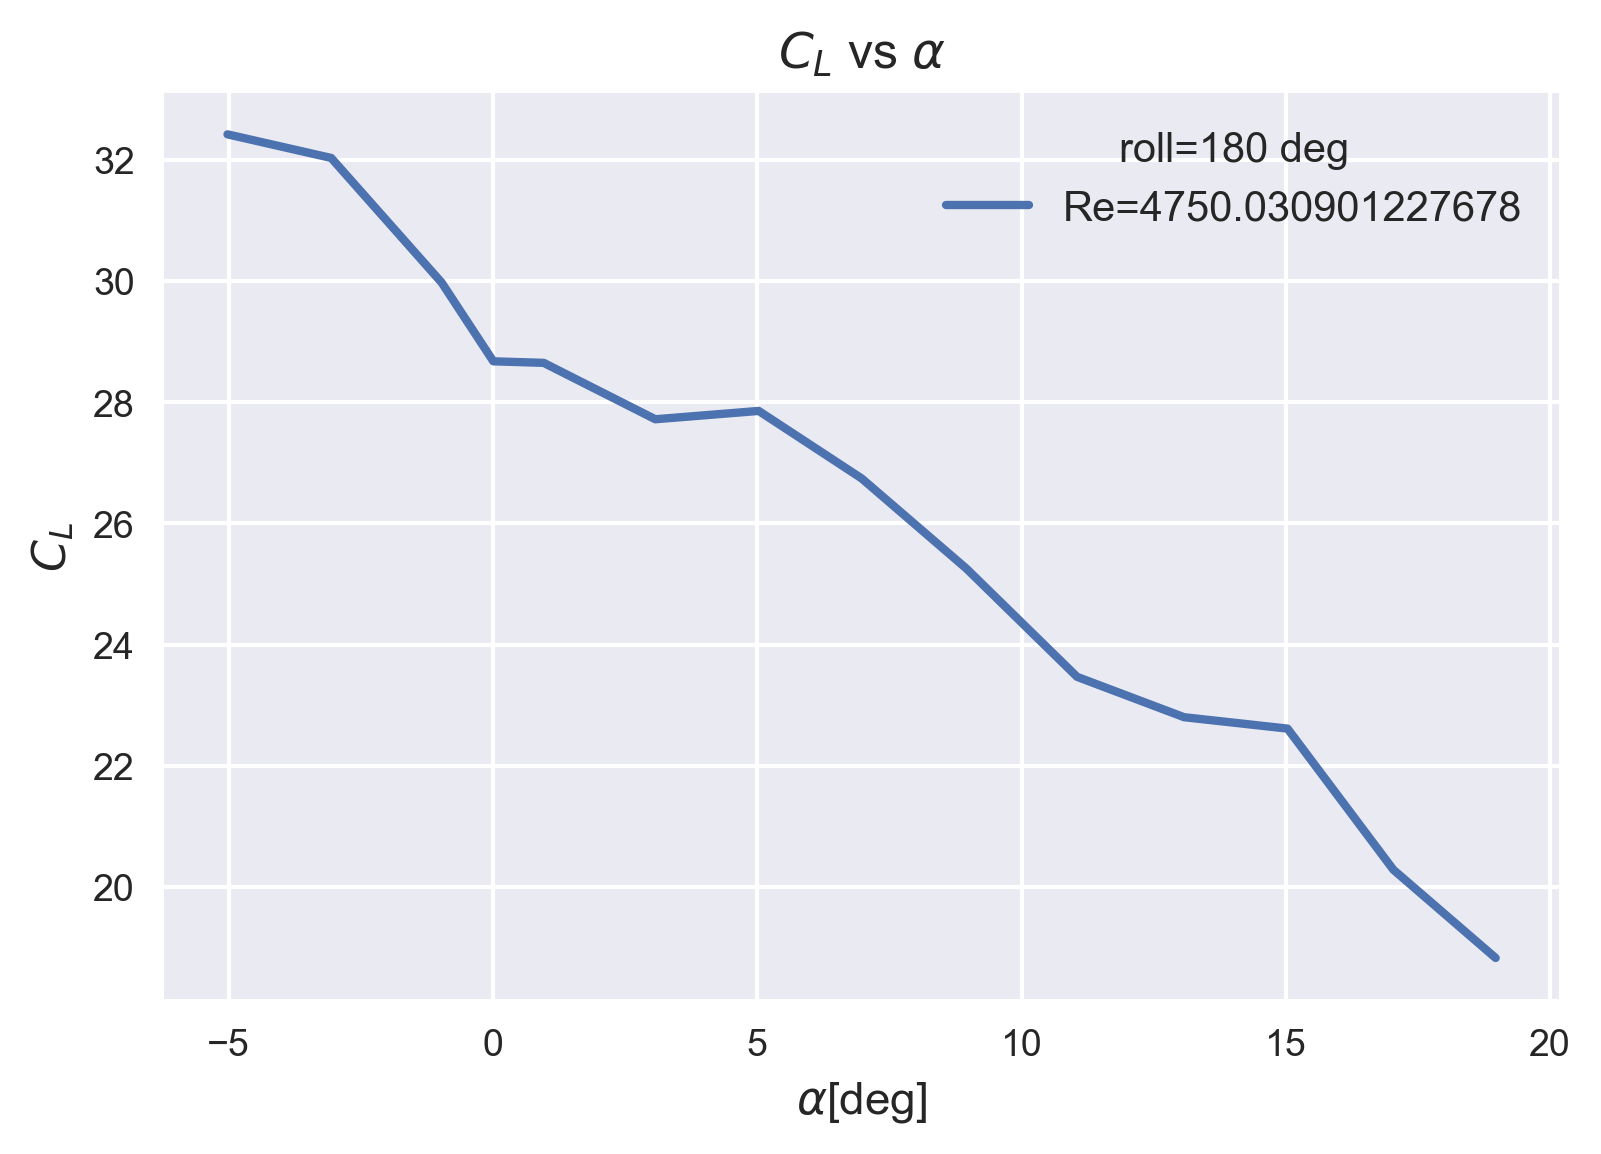

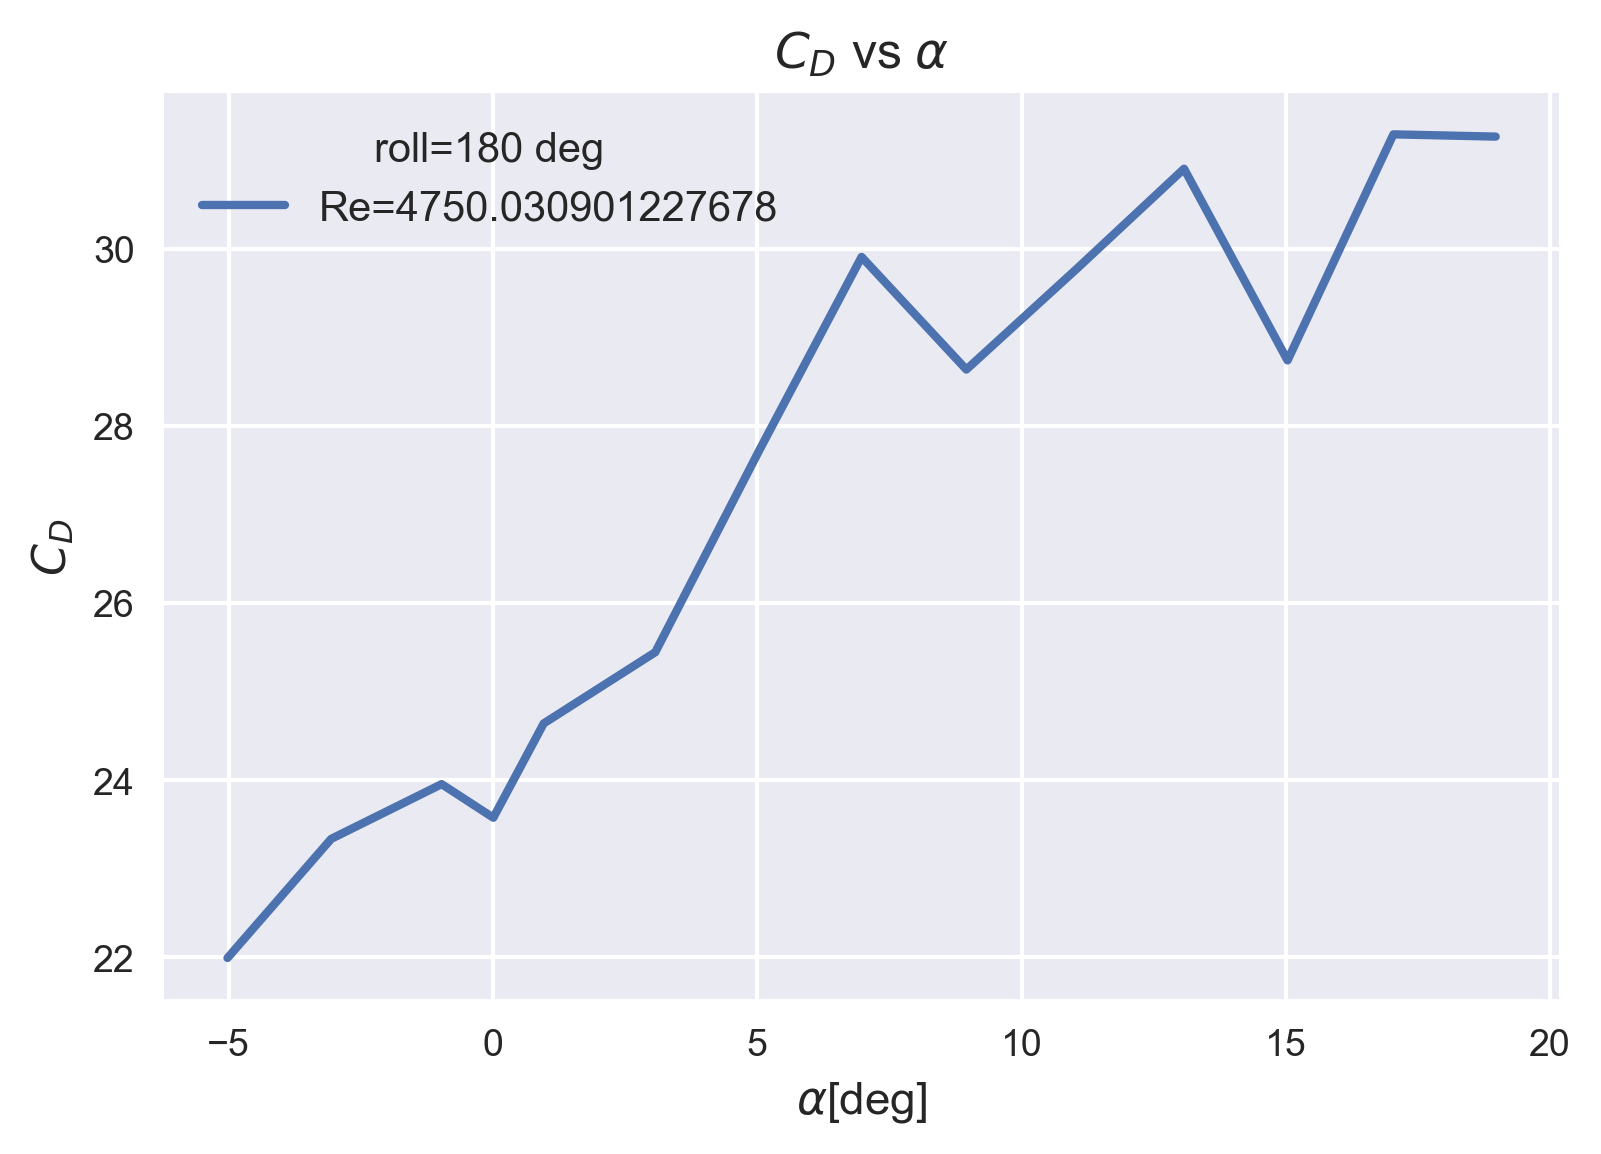

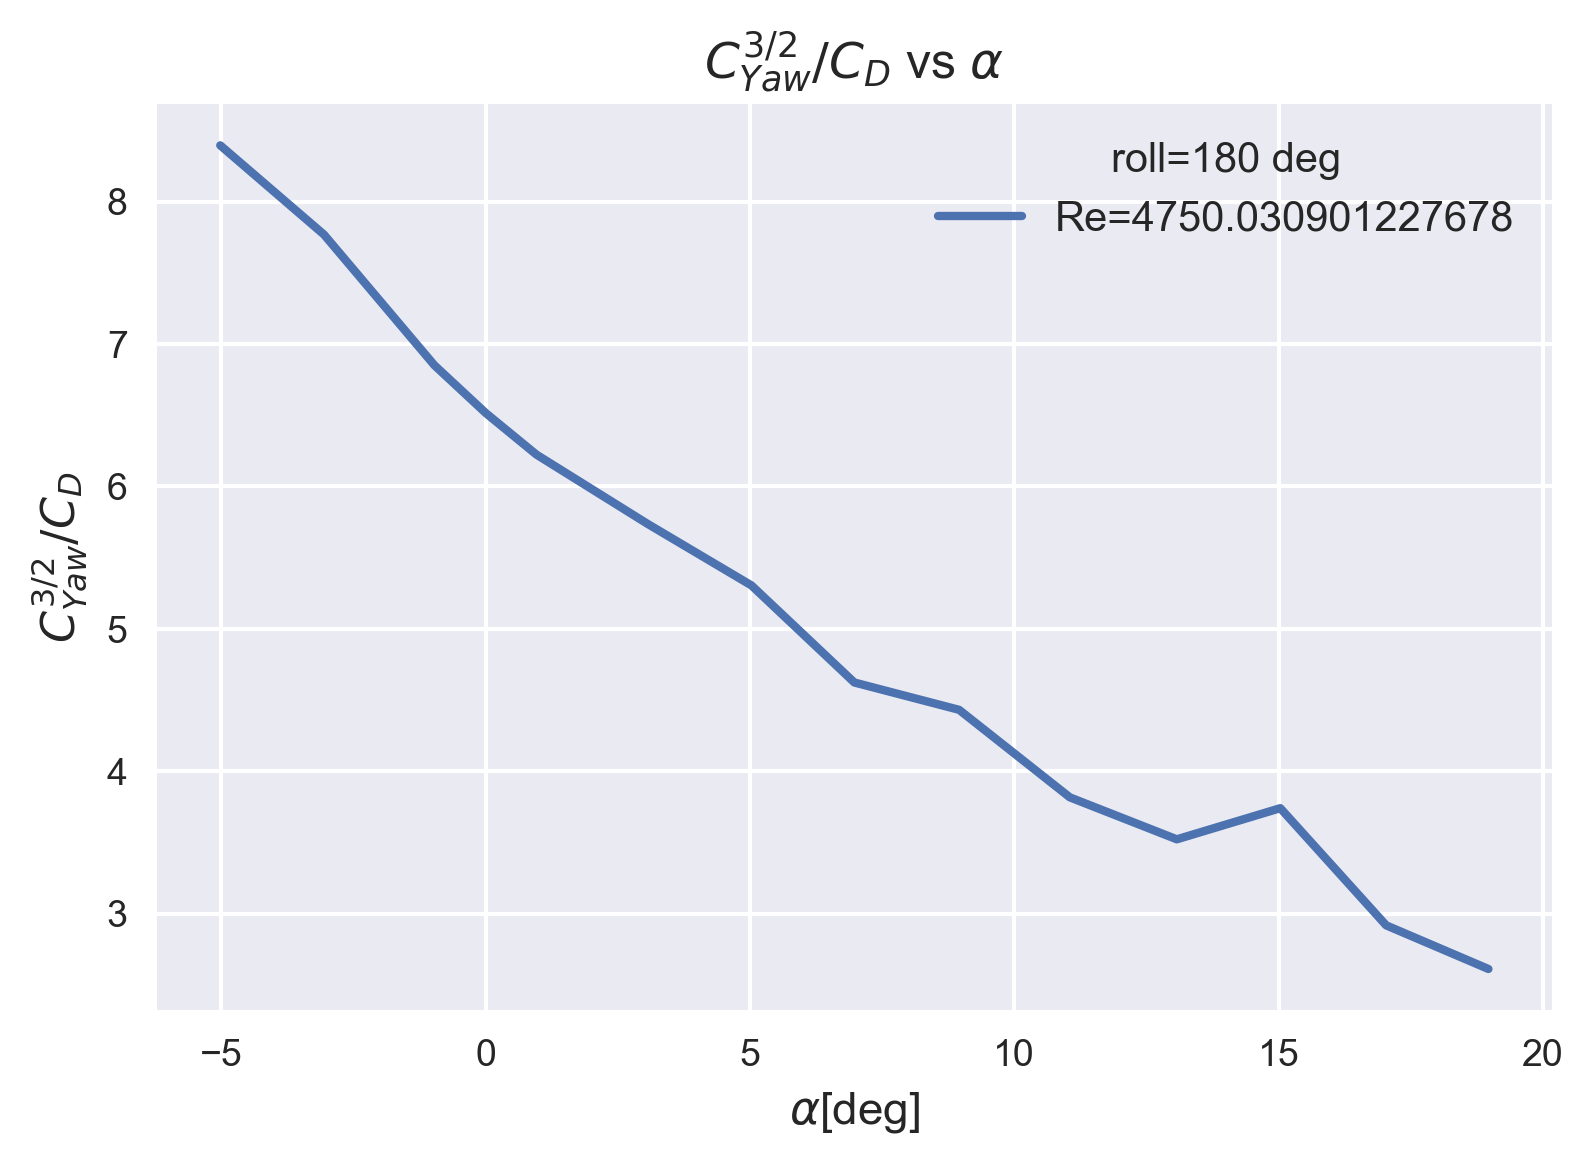

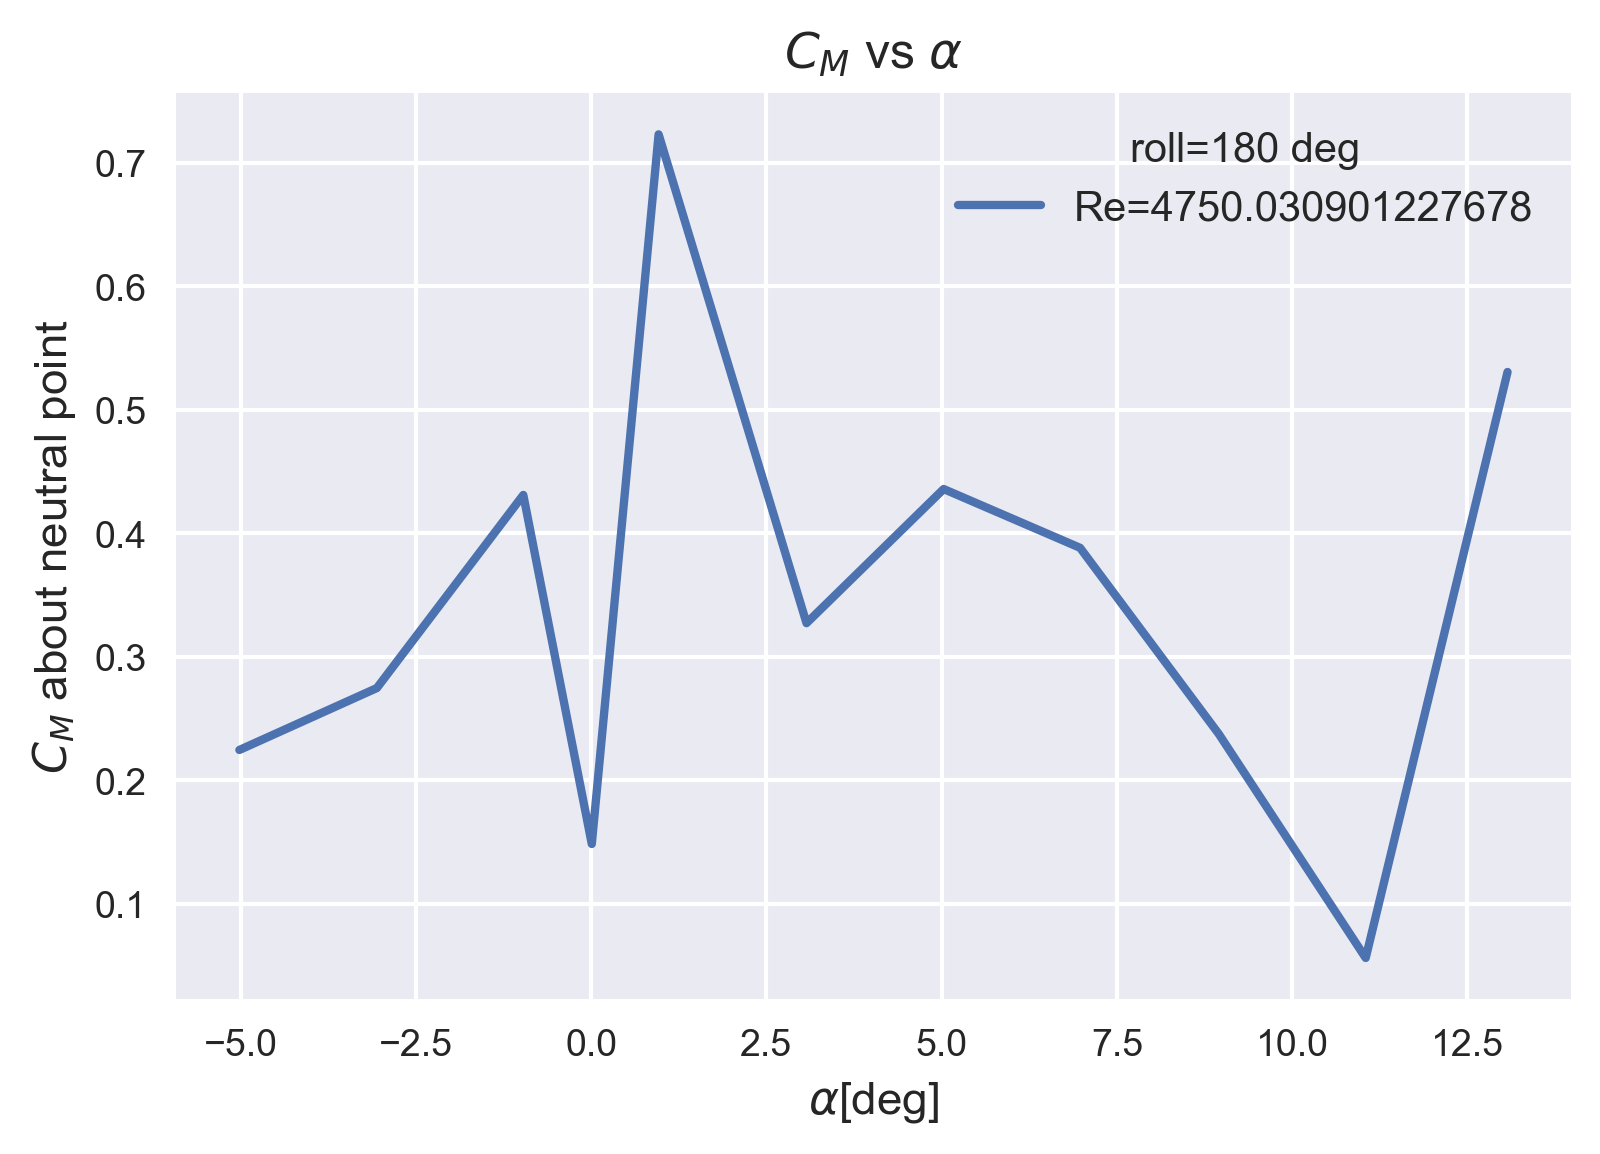

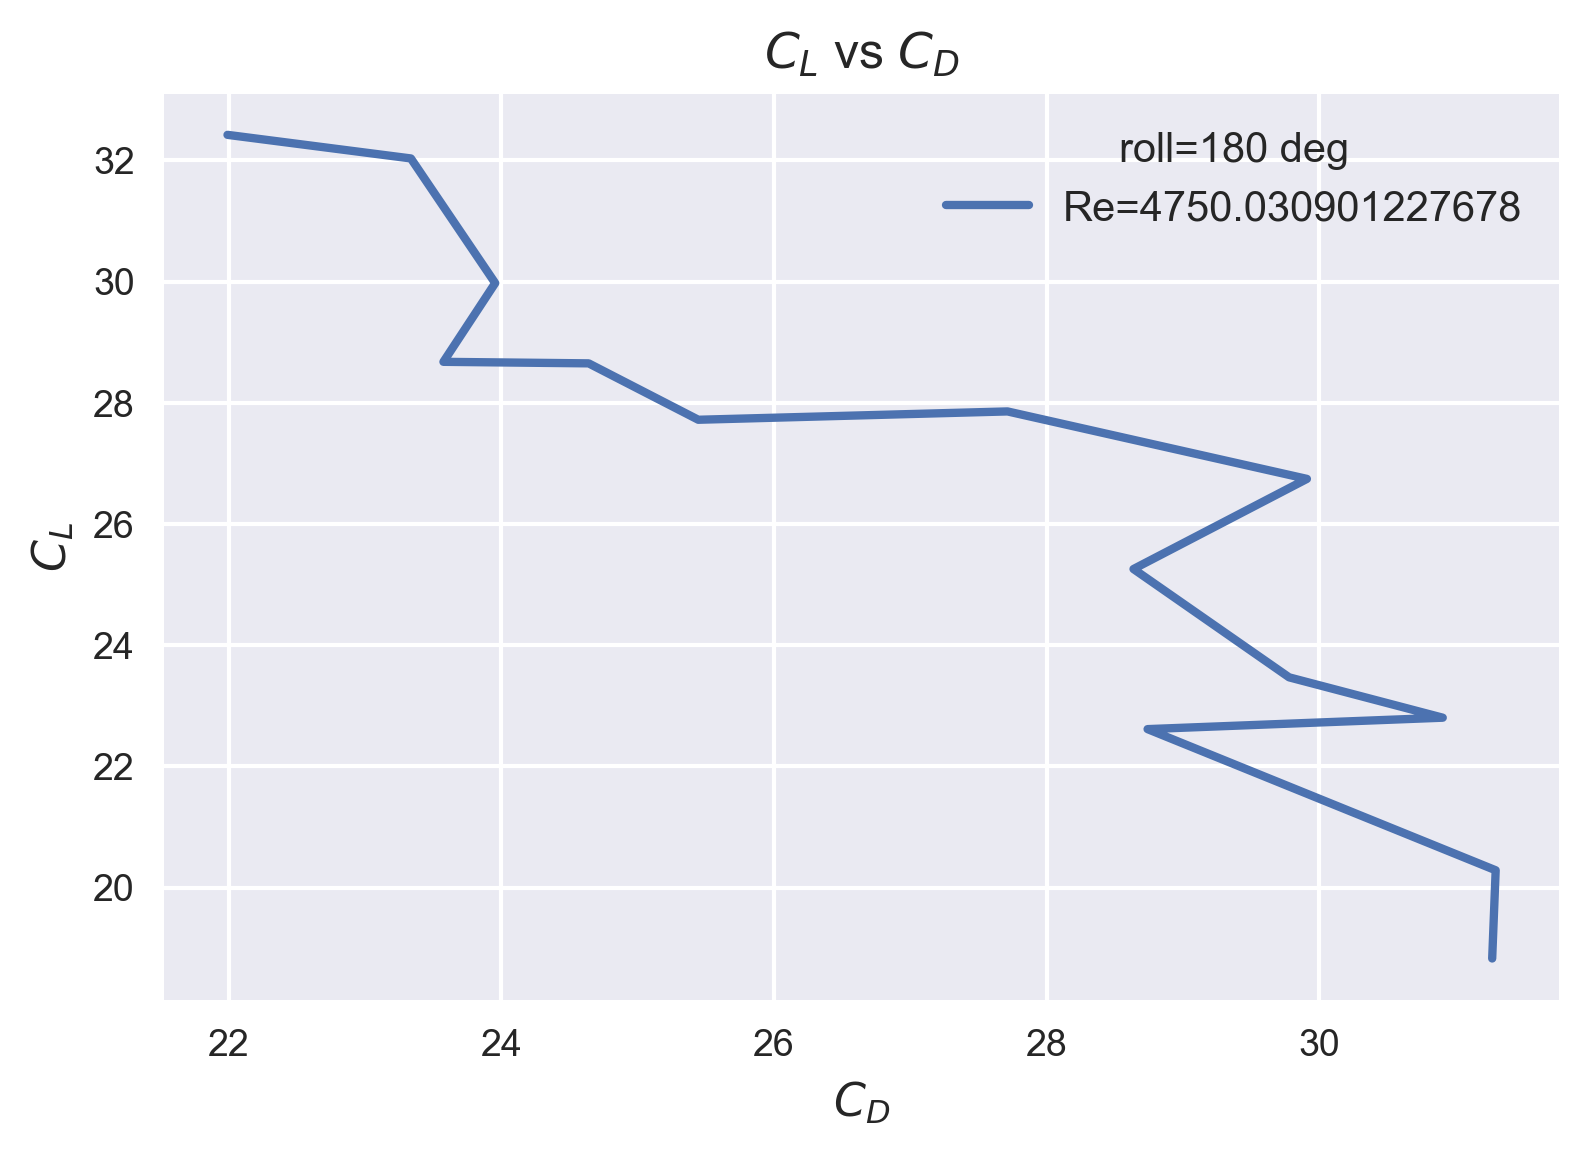

In [757]:
#upside down :

plt.figure(dpi=300)
plt.plot(q6[0][0], q6[0][1], label='Re='+str(re_80))
plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('L/D')
plt.title('$L/D$ vs 'r'$\alpha$')
plt.legend(title='roll=180 deg')
plt.savefig('q6_l_d.png', bbox_inches='tight', dpi=200)

#c_L vs aoa
plt.figure(dpi=300)
plt.plot(q6[0][0], q6[0][3], label='Re='+str(re_80))
plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_L$')
plt.title('$C_L$ vs 'r'$\alpha$')
plt.legend(title='roll=180 deg')
plt.savefig('q6_c_L.png', bbox_inches='tight', dpi=200)

#cd vs alpha
plt.figure(dpi=300)
plt.plot(q6[0][0], q6[0][4], label='Re='+str(re_80))
plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_D$')
plt.title('$C_D$ vs 'r'$\alpha$')
plt.legend(title='roll=180 deg')
plt.savefig('q6_c_d.png', bbox_inches='tight', dpi=200)


#c_yaw^(3/2) /cd vs alpha
plt.figure(dpi=300)
plt.plot(q6[0][0], q6[0][2], label='Re='+str(re_80))

plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_{Yaw}^{3/2} / C_D$')
plt.title('$C_{Yaw}^{3/2} / C_D$ vs 'r'$\alpha$' )
plt.legend(title='roll=180 deg')
plt.savefig('q6_c_l_32.png', bbox_inches='tight', dpi=200)

#C_M
plt.figure(dpi=300)
plt.plot(q6[0][0], CM_updown ,label='Re='+str(re_80))
plt.xlabel(r'$\alpha$[deg]')
plt.ylabel('$C_M$ about neutral point')
plt.title('$C_M$ vs 'r'$\alpha$')
plt.legend(title='roll=180 deg')
plt.savefig('q6_C_M.png', bbox_inches='tight', dpi=200)

#drag polar
plt.figure(dpi=300)
plt.plot(q6[0][4], q6[0][3], label='Re='+str(re_80))
plt.xlabel('$C_D$')
plt.ylabel('$C_L$')
plt.title('$C_L$ vs $C_D$')
plt.legend(title='roll=180 deg')
plt.savefig('q6_drag_polar.png', bbox_inches='tight', dpi=200)
